In [1]:
import pandas as pd
import numpy as np


Website Dataframe info

https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 
pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_data

In [3]:
X.head()

HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
0             0       0        1                  0              1   
1             1       0        0                  0              0   
2             0       1        0                  0              1   
3             1       1        1                  0              1   
4             1       1        1                  0              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        5        18        15         1    0    9          4   
1            1        3         0         0         0    0    7          6   
2            1        5        30        30         1    0    9          4   
3            0        2         0         0         0    0   11          3   
4            0        2         3         0         0    0   11          5   

   Income  
0       3  
1       1  
2       8  
3       6  
4       4

In [4]:
y.value_counts()

Diabetes_binary
0                  218334
1                   35346
dtype: int64

In [5]:
X.shape

(253680, 21)

In [6]:
def check_columns(df):
    """
    This function takes a pandas dataframe as input and returns
    a dataframe with information about each column in the dataframe. For
    each column, it returns the column name, the number of
    unique values in the column, the unique values themselves,
    the number of null values in the column, and the data type of the column.
    The resulting dataframe is sorted by the 'Number of Unique Values' column in ascending order.
​
    Args:
    - df: pandas dataframe
​
    Returns:
    - pandas dataframe
    """
    data = []
    # Loop through each column in the dataframe
    for column in df.columns:
        # Append the column name, number of unique values, unique values, number of null values, and data type to the data list
        data.append(
            [
                column,
                df[column].nunique(),
                df[column].unique(),
                df[column].isna().sum(),
                df[column].isna().mean(),
                df[column].dtype
            ]
        )
    # Create a pandas dataframe from the data list, with column names 'Column Name', 'Number of Unique Values', 'Unique Values', 'Number of Null Values', and 'dtype'
    # Sort the resulting dataframe by the 'Number of Unique Values' column in ascending order
    return pd.DataFrame(
        data,
        columns=[
            "Column Name",
            "Number of Unique Values",
            "Unique Values",
            "Number of Null Values",
            "Proportion of Null Values",
            "dtype"
        ],
    ).sort_values(by="Number of Unique Values")

In [7]:
check_columns(X)

Column Name  Number of Unique Values  \
0                 HighBP                        2   
17                   Sex                        2   
16              DiffWalk                        2   
12           NoDocbcCost                        2   
11         AnyHealthcare                        2   
9                Veggies                        2   
8                 Fruits                        2   
10     HvyAlcoholConsump                        2   
6   HeartDiseaseorAttack                        2   
5                 Stroke                        2   
4                 Smoker                        2   
2              CholCheck                        2   
1               HighChol                        2   
7           PhysActivity                        2   
13               GenHlth                        5   
19             Education                        6   
20                Income                        8   
18                   Age                       13   
14              MentHlth                       31   
15              PhysHlth                       31   
3                    BMI                       84   

                                        Unique Values  Number of Null Values  \
0                                              [1, 0]                      0   
17                                             [0, 1]                      0   
16                                             [1, 0]                      0   
12                                             [0, 1]                      0   
11                                             [1, 0]                      0   
9                                              [1, 0]                      0   
8                                              [0, 1]                      0   
10                                             [0, 1]                      0   
6                                              [0, 1]                      0   
5                                              [0, 1]                      0   
4                                              [1, 0]                      0   
2                                              [1, 0]                      0   
1                                              [1, 0]                      0   
7                                              [0, 1]                      0   
13                                    [5, 3, 2, 4, 1]                      0   
19                                 [4, 6, 3, 5, 2, 1]                      0   
20                           [3, 1, 8, 6, 4, 7, 2, 5]                      0   
18        [9, 7, 11, 10, 8, 13, 4, 6, 2, 12, 5, 1, 3]                      0   
14  [18, 0, 30, 3, 5, 15, 10, 6, 20, 2, 25, 1, 4, ...                      0   
15  [15, 0, 30, 2, 14, 28, 7, 20, 3, 10, 1, 5, 17,...                      0   
3   [40, 25, 28, 27, 24, 30, 34, 26, 33, 21, 23, 2...                      0   

    Proportion of Null Values  dtype  
0                         0.0  int64  
17                        0.0  int64  
16                        0.0  int64  
12                        0.0  int64  
11                        0.0  int64  
9                         0.0  int64  
8                         0.0  int64  
10                        0.0  int64  
6                         0.0  int64  
5                         0.0  int64  
4                         0.0  int64  
2                         0.0  int64  
1                         0.0  int64  
7                         0.0  int64  
13                        0.0  int64  
19                        0.0  int64  
20                        0.0  int64  
18                        0.0  int64  
14                        0.0  int64  
15                        0.0  int64  
3                         0.0  int64

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_012_health_indicators_BRFSS2015.csv


### 1. diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables


In [8]:
diabetes_df1 = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [9]:
X.head()

HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
0             0       0        1                  0              1   
1             1       0        0                  0              0   
2             0       1        0                  0              1   
3             1       1        1                  0              1   
4             1       1        1                  0              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        5        18        15         1    0    9          4   
1            1        3         0         0         0    0    7          6   
2            1        5        30        30         1    0    9          4   
3            0        2         0         0         0    0   11          3   
4            0        2         3         0         0    0   11          5   

   Income  
0       3  
1       1  
2       8  
3       6  
4       4

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [11]:
diabetes_df1.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                0.0   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      0.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   
1            0.0          1.0      3.0       0.0       0.0       0.0  0.0   
2            1.0          1.0      5.0      30.0      30.0       1.0  0.0   
3            1.0          0.0      2.0       0.0       0.0       0.0  0.0   
4            1.0          0.0      2.0       3.0       0.0       0.0  0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.0     8.0  
3  11.0        3.0     6.0  
4  11.0        5.0     4.0

In [12]:
diabetes_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# X df and diabetes_df1 are the same, just diff dtype:   USE DIABETES_DF1 (it has diabetes cat already appended to it)

### 2. diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.


In [13]:
diabetes_50_50 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [14]:
diabetes_50_50.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           1.0     0.0      1.0                0.0   
1                   0.0           0.0     1.0      0.0                0.0   
2                   0.0           1.0     1.0      1.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      3.0       5.0      30.0       0.0  1.0   
1            1.0          0.0      3.0       0.0       0.0       0.0  1.0   
2            1.0          0.0      1.0       0.0      10.0       0.0  1.0   
3            1.0          0.0      3.0       0.0       3.0       0.0  1.0   
4            1.0          0.0      2.0       0.0       0.0       0.0  0.0   

    Age  Education  Income  
0   4.0        6.0     8.0  
1  12.0        6.0     8.0  
2  13.0        6.0     8.0  
3  11.0        6.0     8.0  
4   8.0        5.0     8.0

In [15]:
diabetes_50_50.shape

(70692, 22)

### 3. diabetes _ binary _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

In [16]:
diabetes_df2 = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [17]:
diabetes_df2.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                0.0   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      0.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   
1            0.0          1.0      3.0       0.0       0.0       0.0  0.0   
2            1.0          1.0      5.0      30.0      30.0       1.0  0.0   
3            1.0          0.0      2.0       0.0       0.0       0.0  0.0   
4            1.0          0.0      2.0       3.0       0.0       0.0  0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.0     8.0  
3  11.0        3.0     6.0  
4  11.0        5.0     4.0

In [18]:
check_columns(diabetes_df2)

Column Name  Number of Unique Values  \
0        Diabetes_binary                        2   
18                   Sex                        2   
17              DiffWalk                        2   
13           NoDocbcCost                        2   
12         AnyHealthcare                        2   
11     HvyAlcoholConsump                        2   
9                 Fruits                        2   
8           PhysActivity                        2   
10               Veggies                        2   
6                 Stroke                        2   
5                 Smoker                        2   
3              CholCheck                        2   
2               HighChol                        2   
1                 HighBP                        2   
7   HeartDiseaseorAttack                        2   
14               GenHlth                        5   
20             Education                        6   
21                Income                        8   
19                   Age                       13   
15              MentHlth                       31   
16              PhysHlth                       31   
4                    BMI                       84   

                                        Unique Values  Number of Null Values  \
0                                          [0.0, 1.0]                      0   
18                                         [0.0, 1.0]                      0   
17                                         [1.0, 0.0]                      0   
13                                         [0.0, 1.0]                      0   
12                                         [1.0, 0.0]                      0   
11                                         [0.0, 1.0]                      0   
9                                          [0.0, 1.0]                      0   
8                                          [0.0, 1.0]                      0   
10                                         [1.0, 0.0]                      0   
6                                          [0.0, 1.0]                      0   
5                                          [1.0, 0.0]                      0   
3                                          [1.0, 0.0]                      0   
2                                          [1.0, 0.0]                      0   
1                                          [1.0, 0.0]                      0   
7                                          [0.0, 1.0]                      0   
14                          [5.0, 3.0, 2.0, 4.0, 1.0]                      0   
20                     [4.0, 6.0, 3.0, 5.0, 2.0, 1.0]                      0   
21           [3.0, 1.0, 8.0, 6.0, 4.0, 7.0, 2.0, 5.0]                      0   
19  [9.0, 7.0, 11.0, 10.0, 8.0, 13.0, 4.0, 6.0, 2....                      0   
15  [18.0, 0.0, 30.0, 3.0, 5.0, 15.0, 10.0, 6.0, 2...                      0   
16  [15.0, 0.0, 30.0, 2.0, 14.0, 28.0, 7.0, 20.0, ...                      0   
4   [40.0, 25.0, 28.0, 27.0, 24.0, 30.0, 34.0, 26....                      0   

    Proportion of Null Values    dtype  
0                         0.0  float64  
18                        0.0  float64  
17                        0.0  float64  
13                        0.0  float64  
12                        0.0  float64  
11                        0.0  float64  
9                         0.0  float64  
8                         0.0  float64  
10                        0.0  float64  
6                         0.0  float64  
5                         0.0  float64  
3                         0.0  float64  
2                         0.0  float64  
1                         0.0  float64  
7                         0.0  float64  
14                        0.0  float64  
20                        0.0  float64  
21                        0.0  float64  
19                        0.0  float64  
15                        0.0  float64  
16                        0.0  float64  
4                         0.0  float64

In [19]:
check_columns(diabetes_df1)

Column Name  Number of Unique Values  \
10               Veggies                        2   
1                 HighBP                        2   
2               HighChol                        2   
3              CholCheck                        2   
18                   Sex                        2   
5                 Smoker                        2   
6                 Stroke                        2   
7   HeartDiseaseorAttack                        2   
8           PhysActivity                        2   
9                 Fruits                        2   
17              DiffWalk                        2   
11     HvyAlcoholConsump                        2   
12         AnyHealthcare                        2   
13           NoDocbcCost                        2   
0           Diabetes_012                        3   
14               GenHlth                        5   
20             Education                        6   
21                Income                        8   
19                   Age                       13   
15              MentHlth                       31   
16              PhysHlth                       31   
4                    BMI                       84   

                                        Unique Values  Number of Null Values  \
10                                         [1.0, 0.0]                      0   
1                                          [1.0, 0.0]                      0   
2                                          [1.0, 0.0]                      0   
3                                          [1.0, 0.0]                      0   
18                                         [0.0, 1.0]                      0   
5                                          [1.0, 0.0]                      0   
6                                          [0.0, 1.0]                      0   
7                                          [0.0, 1.0]                      0   
8                                          [0.0, 1.0]                      0   
9                                          [0.0, 1.0]                      0   
17                                         [1.0, 0.0]                      0   
11                                         [0.0, 1.0]                      0   
12                                         [1.0, 0.0]                      0   
13                                         [0.0, 1.0]                      0   
0                                     [0.0, 2.0, 1.0]                      0   
14                          [5.0, 3.0, 2.0, 4.0, 1.0]                      0   
20                     [4.0, 6.0, 3.0, 5.0, 2.0, 1.0]                      0   
21           [3.0, 1.0, 8.0, 6.0, 4.0, 7.0, 2.0, 5.0]                      0   
19  [9.0, 7.0, 11.0, 10.0, 8.0, 13.0, 4.0, 6.0, 2....                      0   
15  [18.0, 0.0, 30.0, 3.0, 5.0, 15.0, 10.0, 6.0, 2...                      0   
16  [15.0, 0.0, 30.0, 2.0, 14.0, 28.0, 7.0, 20.0, ...                      0   
4   [40.0, 25.0, 28.0, 27.0, 24.0, 30.0, 34.0, 26....                      0   

    Proportion of Null Values    dtype  
10                        0.0  float64  
1                         0.0  float64  
2                         0.0  float64  
3                         0.0  float64  
18                        0.0  float64  
5                         0.0  float64  
6                         0.0  float64  
7                         0.0  float64  
8                         0.0  float64  
9                         0.0  float64  
17                        0.0  float64  
11                        0.0  float64  
12                        0.0  float64  
13                        0.0  float64  
0                         0.0  float64  
14                        0.0  float64  
20                        0.0  float64  
21                        0.0  float64  
19                        0.0  float64  
15                        0.0  float64  
16                        0.0  float64  
4                         0.0  float64

# Lets start with the first dataframe

diabetes_df1

In [20]:
diabetes_df1.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                0.0   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      0.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   
1            0.0          1.0      3.0       0.0       0.0       0.0  0.0   
2            1.0          1.0      5.0      30.0      30.0       1.0  0.0   
3            1.0          0.0      2.0       0.0       0.0       0.0  0.0   
4            1.0          0.0      2.0       3.0       0.0       0.0  0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.0     8.0  
3  11.0        3.0     6.0  
4  11.0        5.0     4.0

In [21]:
check_columns(diabetes_df1)

Column Name  Number of Unique Values  \
10               Veggies                        2   
1                 HighBP                        2   
2               HighChol                        2   
3              CholCheck                        2   
18                   Sex                        2   
5                 Smoker                        2   
6                 Stroke                        2   
7   HeartDiseaseorAttack                        2   
8           PhysActivity                        2   
9                 Fruits                        2   
17              DiffWalk                        2   
11     HvyAlcoholConsump                        2   
12         AnyHealthcare                        2   
13           NoDocbcCost                        2   
0           Diabetes_012                        3   
14               GenHlth                        5   
20             Education                        6   
21                Income                        8   
19                   Age                       13   
15              MentHlth                       31   
16              PhysHlth                       31   
4                    BMI                       84   

                                        Unique Values  Number of Null Values  \
10                                         [1.0, 0.0]                      0   
1                                          [1.0, 0.0]                      0   
2                                          [1.0, 0.0]                      0   
3                                          [1.0, 0.0]                      0   
18                                         [0.0, 1.0]                      0   
5                                          [1.0, 0.0]                      0   
6                                          [0.0, 1.0]                      0   
7                                          [0.0, 1.0]                      0   
8                                          [0.0, 1.0]                      0   
9                                          [0.0, 1.0]                      0   
17                                         [1.0, 0.0]                      0   
11                                         [0.0, 1.0]                      0   
12                                         [1.0, 0.0]                      0   
13                                         [0.0, 1.0]                      0   
0                                     [0.0, 2.0, 1.0]                      0   
14                          [5.0, 3.0, 2.0, 4.0, 1.0]                      0   
20                     [4.0, 6.0, 3.0, 5.0, 2.0, 1.0]                      0   
21           [3.0, 1.0, 8.0, 6.0, 4.0, 7.0, 2.0, 5.0]                      0   
19  [9.0, 7.0, 11.0, 10.0, 8.0, 13.0, 4.0, 6.0, 2....                      0   
15  [18.0, 0.0, 30.0, 3.0, 5.0, 15.0, 10.0, 6.0, 2...                      0   
16  [15.0, 0.0, 30.0, 2.0, 14.0, 28.0, 7.0, 20.0, ...                      0   
4   [40.0, 25.0, 28.0, 27.0, 24.0, 30.0, 34.0, 26....                      0   

    Proportion of Null Values    dtype  
10                        0.0  float64  
1                         0.0  float64  
2                         0.0  float64  
3                         0.0  float64  
18                        0.0  float64  
5                         0.0  float64  
6                         0.0  float64  
7                         0.0  float64  
8                         0.0  float64  
9                         0.0  float64  
17                        0.0  float64  
11                        0.0  float64  
12                        0.0  float64  
13                        0.0  float64  
0                         0.0  float64  
14                        0.0  float64  
20                        0.0  float64  
21                        0.0  float64  
19                        0.0  float64  
15                        0.0  float64  
16                        0.0  float64  
4                         0.0  float64

In [22]:
# lets lowercase the columns
diabetes_df1.columns = diabetes_df1.columns.str.lower()

In [23]:
check_columns(diabetes_df1)

Column Name  Number of Unique Values  \
10               veggies                        2   
1                 highbp                        2   
2               highchol                        2   
3              cholcheck                        2   
18                   sex                        2   
5                 smoker                        2   
6                 stroke                        2   
7   heartdiseaseorattack                        2   
8           physactivity                        2   
9                 fruits                        2   
17              diffwalk                        2   
11     hvyalcoholconsump                        2   
12         anyhealthcare                        2   
13           nodocbccost                        2   
0           diabetes_012                        3   
14               genhlth                        5   
20             education                        6   
21                income                        8   
19                   age                       13   
15              menthlth                       31   
16              physhlth                       31   
4                    bmi                       84   

                                        Unique Values  Number of Null Values  \
10                                         [1.0, 0.0]                      0   
1                                          [1.0, 0.0]                      0   
2                                          [1.0, 0.0]                      0   
3                                          [1.0, 0.0]                      0   
18                                         [0.0, 1.0]                      0   
5                                          [1.0, 0.0]                      0   
6                                          [0.0, 1.0]                      0   
7                                          [0.0, 1.0]                      0   
8                                          [0.0, 1.0]                      0   
9                                          [0.0, 1.0]                      0   
17                                         [1.0, 0.0]                      0   
11                                         [0.0, 1.0]                      0   
12                                         [1.0, 0.0]                      0   
13                                         [0.0, 1.0]                      0   
0                                     [0.0, 2.0, 1.0]                      0   
14                          [5.0, 3.0, 2.0, 4.0, 1.0]                      0   
20                     [4.0, 6.0, 3.0, 5.0, 2.0, 1.0]                      0   
21           [3.0, 1.0, 8.0, 6.0, 4.0, 7.0, 2.0, 5.0]                      0   
19  [9.0, 7.0, 11.0, 10.0, 8.0, 13.0, 4.0, 6.0, 2....                      0   
15  [18.0, 0.0, 30.0, 3.0, 5.0, 15.0, 10.0, 6.0, 2...                      0   
16  [15.0, 0.0, 30.0, 2.0, 14.0, 28.0, 7.0, 20.0, ...                      0   
4   [40.0, 25.0, 28.0, 27.0, 24.0, 30.0, 34.0, 26....                      0   

    Proportion of Null Values    dtype  
10                        0.0  float64  
1                         0.0  float64  
2                         0.0  float64  
3                         0.0  float64  
18                        0.0  float64  
5                         0.0  float64  
6                         0.0  float64  
7                         0.0  float64  
8                         0.0  float64  
9                         0.0  float64  
17                        0.0  float64  
11                        0.0  float64  
12                        0.0  float64  
13                        0.0  float64  
0                         0.0  float64  
14                        0.0  float64  
20                        0.0  float64  
21                        0.0  float64  
19                        0.0  float64  
15                        0.0  float64  
16                        0.0  float64  
4                         0.0  float64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# lets make the split for train, validate, test
def split_data(df, target=None) -> tuple:
    '''
    split_data will split data into train, validate, and test sets
    
    if a discrete target is in the data set, it may be specified
    with the target kwarg (Default None)
    
    return: three pandas DataFrames
    '''
    train_val, test = train_test_split(
        df, 
        train_size=0.8, 
        random_state=1108,
        stratify=df[target])
    train, validate = train_test_split(
        train_val,
        train_size=0.7,
        random_state=1108,
        stratify=train_val[target])
    print(f'Train: {len(train)/len(df)}')
    print(f'Validate: {len(validate)/len(df)}')
    print(f'Test: {len(test)/len(df)}')
    return train, validate, test

In [26]:
train, validate, test = split_data(diabetes_df1, target='diabetes_012')

Train: 0.5599968464206875
Validate: 0.2400031535793125
Test: 0.2


In [27]:
diabetes_df1.diabetes_012.shape

(253680,)

In [28]:
diabetes_df1.shape

(253680, 22)

In [29]:
train.head()

diabetes_012  highbp  highchol  cholcheck   bmi  smoker  stroke  \
167250           0.0     1.0       0.0        1.0  29.0     0.0     0.0   
188878           0.0     0.0       0.0        1.0  26.0     1.0     0.0   
140271           0.0     1.0       0.0        1.0  30.0     1.0     0.0   
240633           0.0     1.0       0.0        1.0  26.0     1.0     0.0   
105700           0.0     0.0       0.0        1.0  20.0     1.0     0.0   

        heartdiseaseorattack  physactivity  fruits  veggies  \
167250                   0.0           1.0     0.0      0.0   
188878                   0.0           1.0     0.0      1.0   
140271                   1.0           1.0     0.0      1.0   
240633                   0.0           0.0     1.0      0.0   
105700                   0.0           1.0     1.0      1.0   

        hvyalcoholconsump  anyhealthcare  nodocbccost  genhlth  menthlth  \
167250                0.0            1.0          0.0      1.0       7.0   
188878                0.0            1.0          0.0      2.0       0.0   
140271                0.0            1.0          0.0      4.0       0.0   
240633                0.0            1.0          0.0      3.0       0.0   
105700                0.0            1.0          0.0      2.0       0.0   

        physhlth  diffwalk  sex   age  education  income  
167250       7.0       1.0  0.0   8.0        5.0     5.0  
188878       0.0       0.0  0.0   5.0        6.0     8.0  
140271      20.0       0.0  1.0  11.0        4.0     3.0  
240633       3.0       0.0  1.0  12.0        4.0     5.0  
105700       3.0       0.0  0.0  10.0        6.0     8.0

In [30]:
diabetes_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   diabetes_012          253680 non-null  float64
 1   highbp                253680 non-null  float64
 2   highchol              253680 non-null  float64
 3   cholcheck             253680 non-null  float64
 4   bmi                   253680 non-null  float64
 5   smoker                253680 non-null  float64
 6   stroke                253680 non-null  float64
 7   heartdiseaseorattack  253680 non-null  float64
 8   physactivity          253680 non-null  float64
 9   fruits                253680 non-null  float64
 10  veggies               253680 non-null  float64
 11  hvyalcoholconsump     253680 non-null  float64
 12  anyhealthcare         253680 non-null  float64
 13  nodocbccost           253680 non-null  float64
 14  genhlth               253680 non-null  float64
 15  

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
columns = train.columns

## Explore

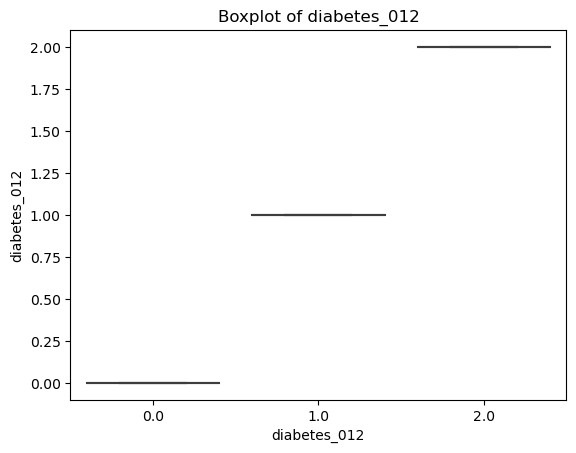

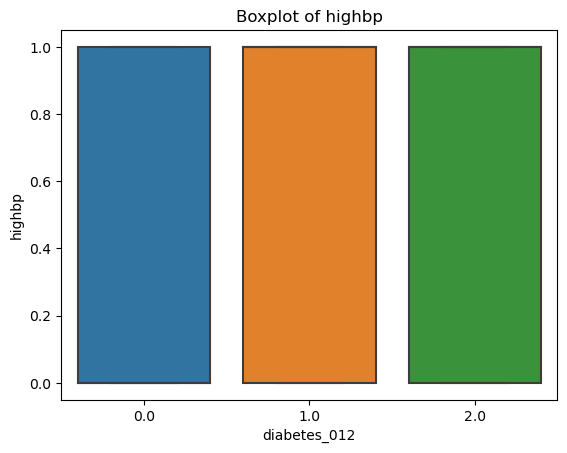

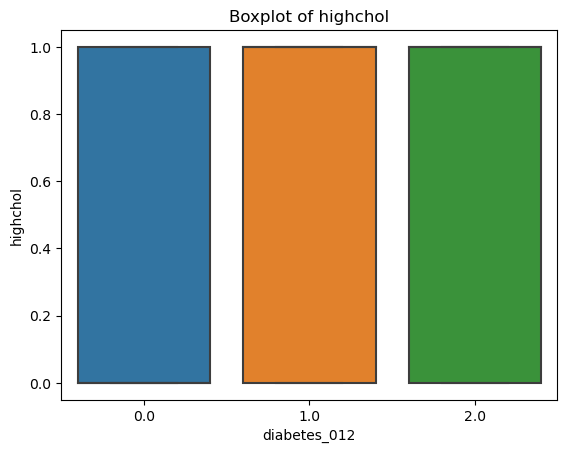

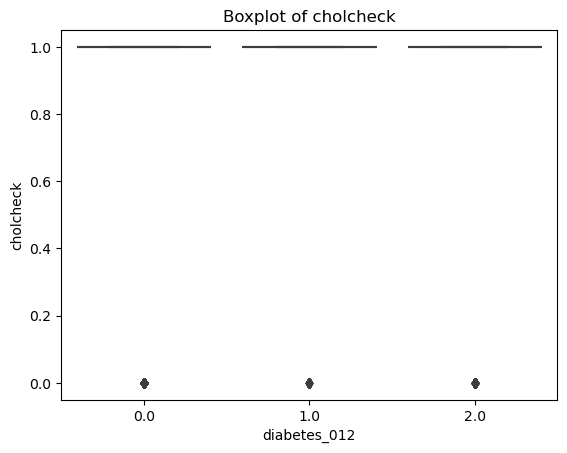

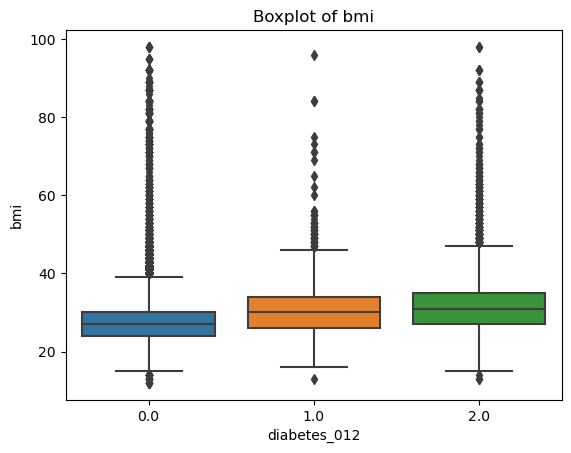

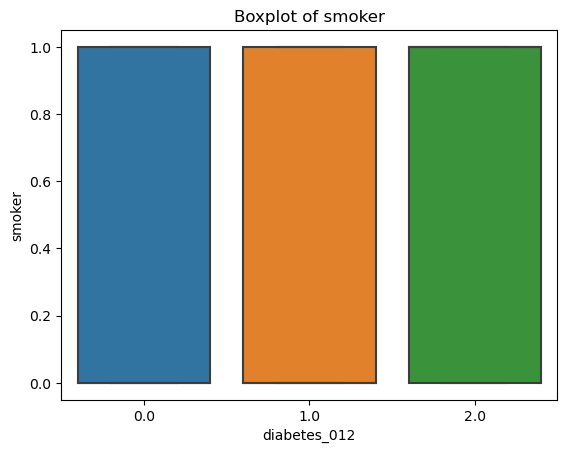

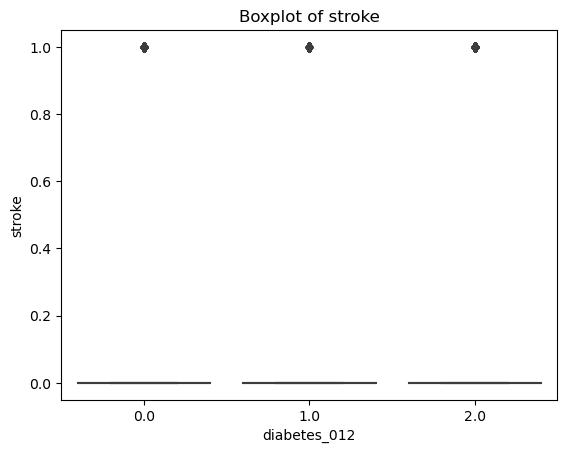

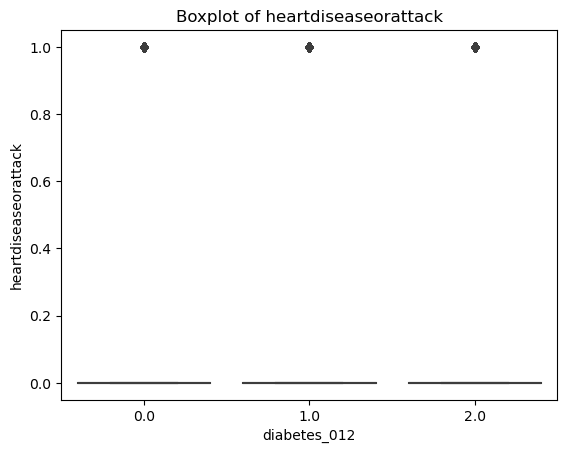

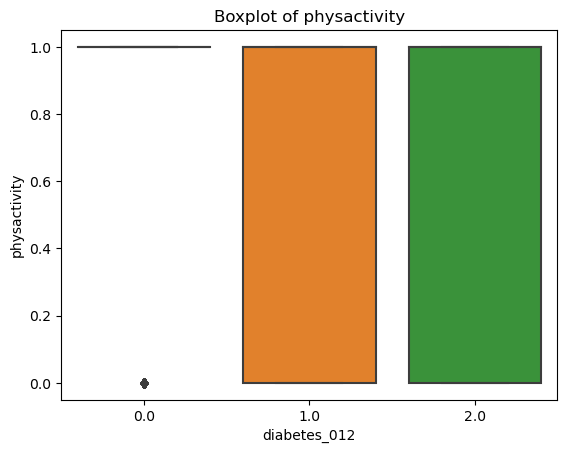

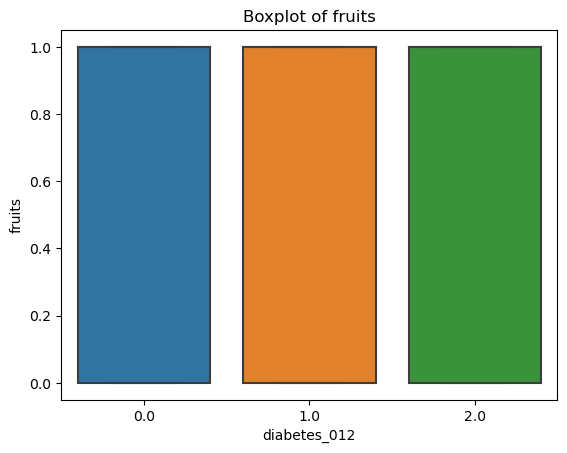

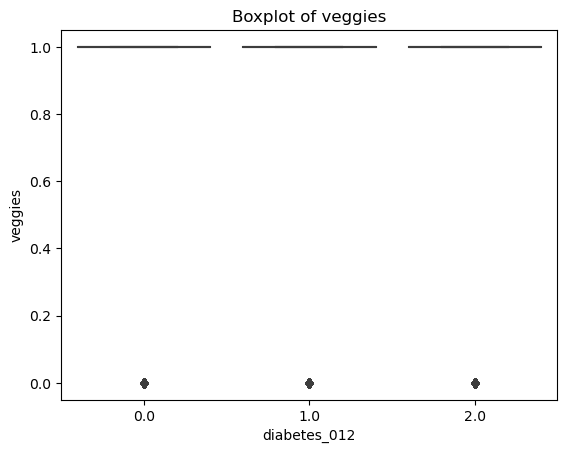

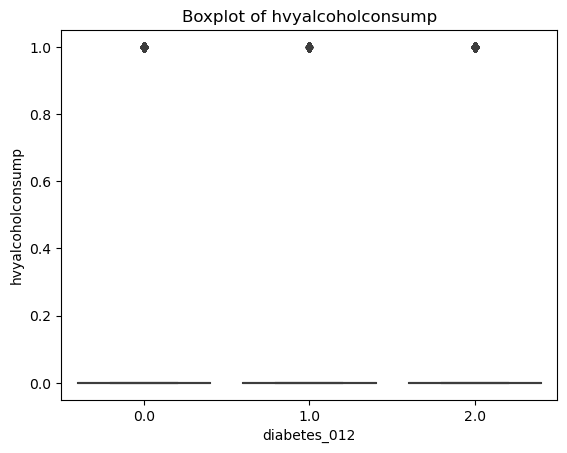

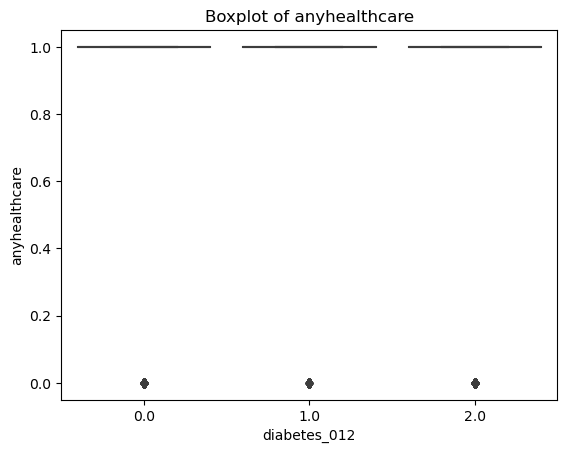

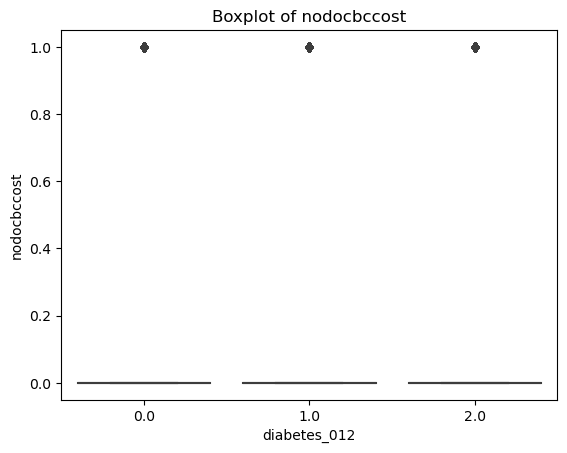

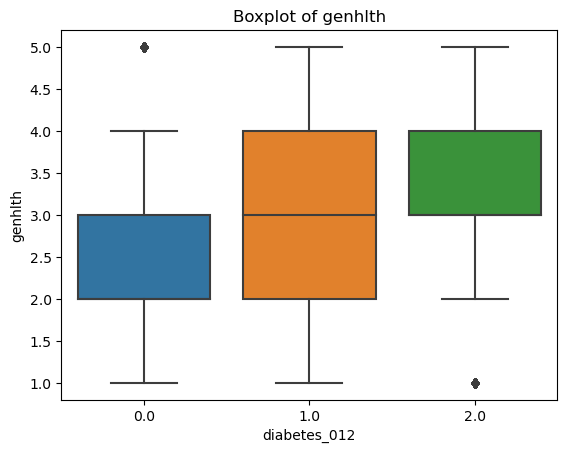

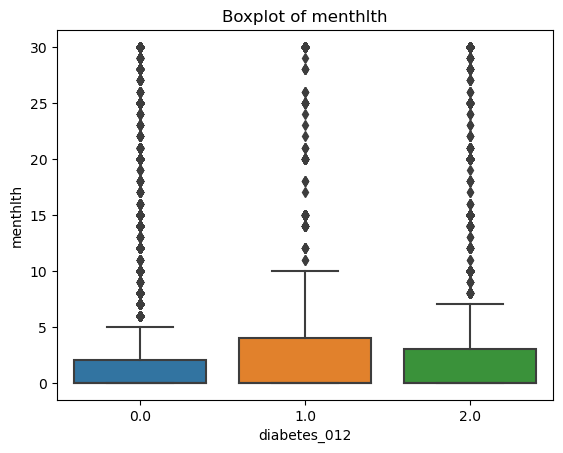

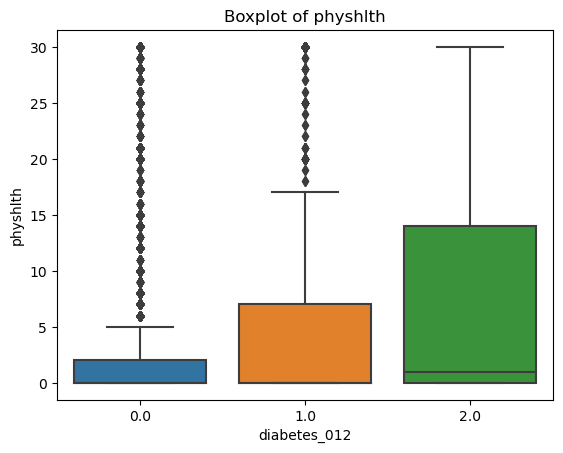

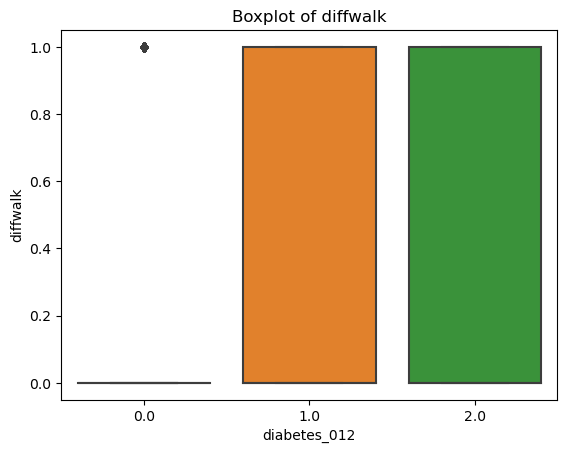

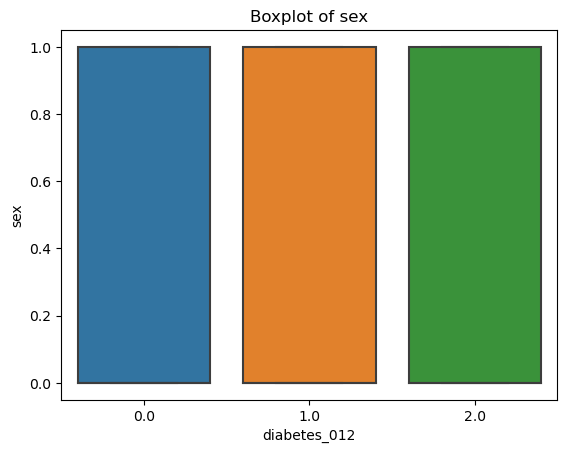

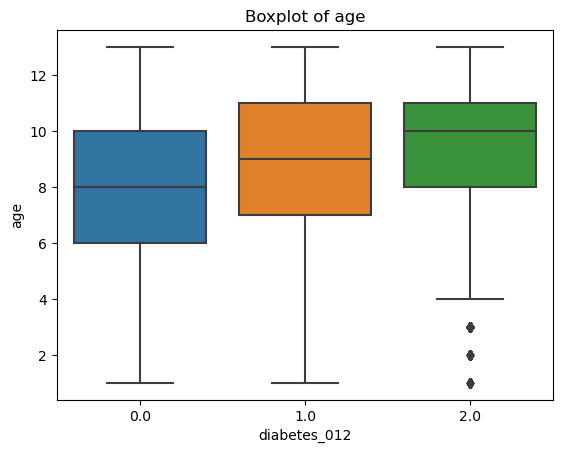

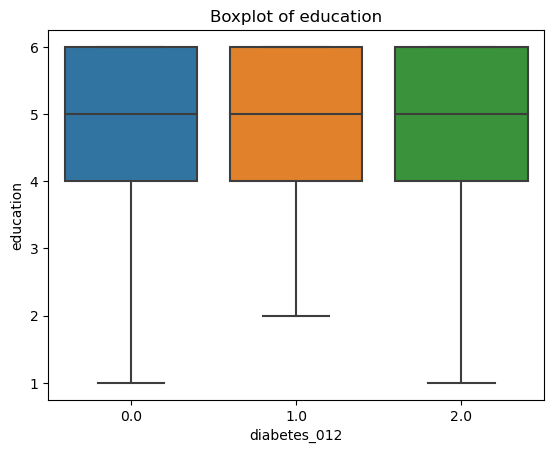

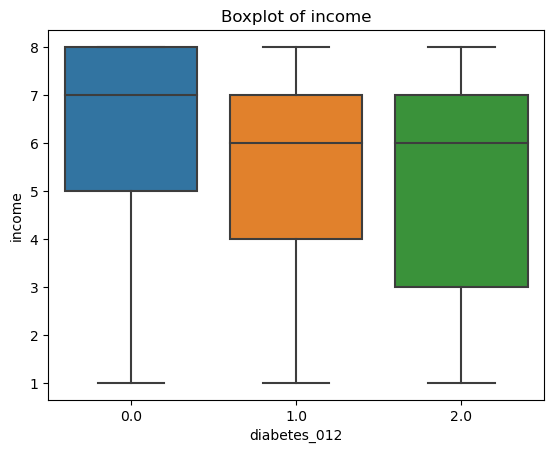

In [33]:
for col in train:
    sns.boxplot(data=train, x='diabetes_012', y= col)
    plt.title(f'Boxplot of {col}')
    plt.show()

### Whats categories of features do we have?


In [34]:
dietary = ['veggies', 'fruits']
bloodwork = ['highbp', 'highchol', 'cholcheck']
exercise = ['physactivity', 'diffwalk']
negative_att = ['smoker', 'stroke', 'heartdiseaseorattack', 'hvyalcoholconsump']
healthcare = ['anyheaalthcare', 'nodocbccost']

### What features have the best correlation to diabetes_012?

In [46]:
train.shape


(142060, 22)

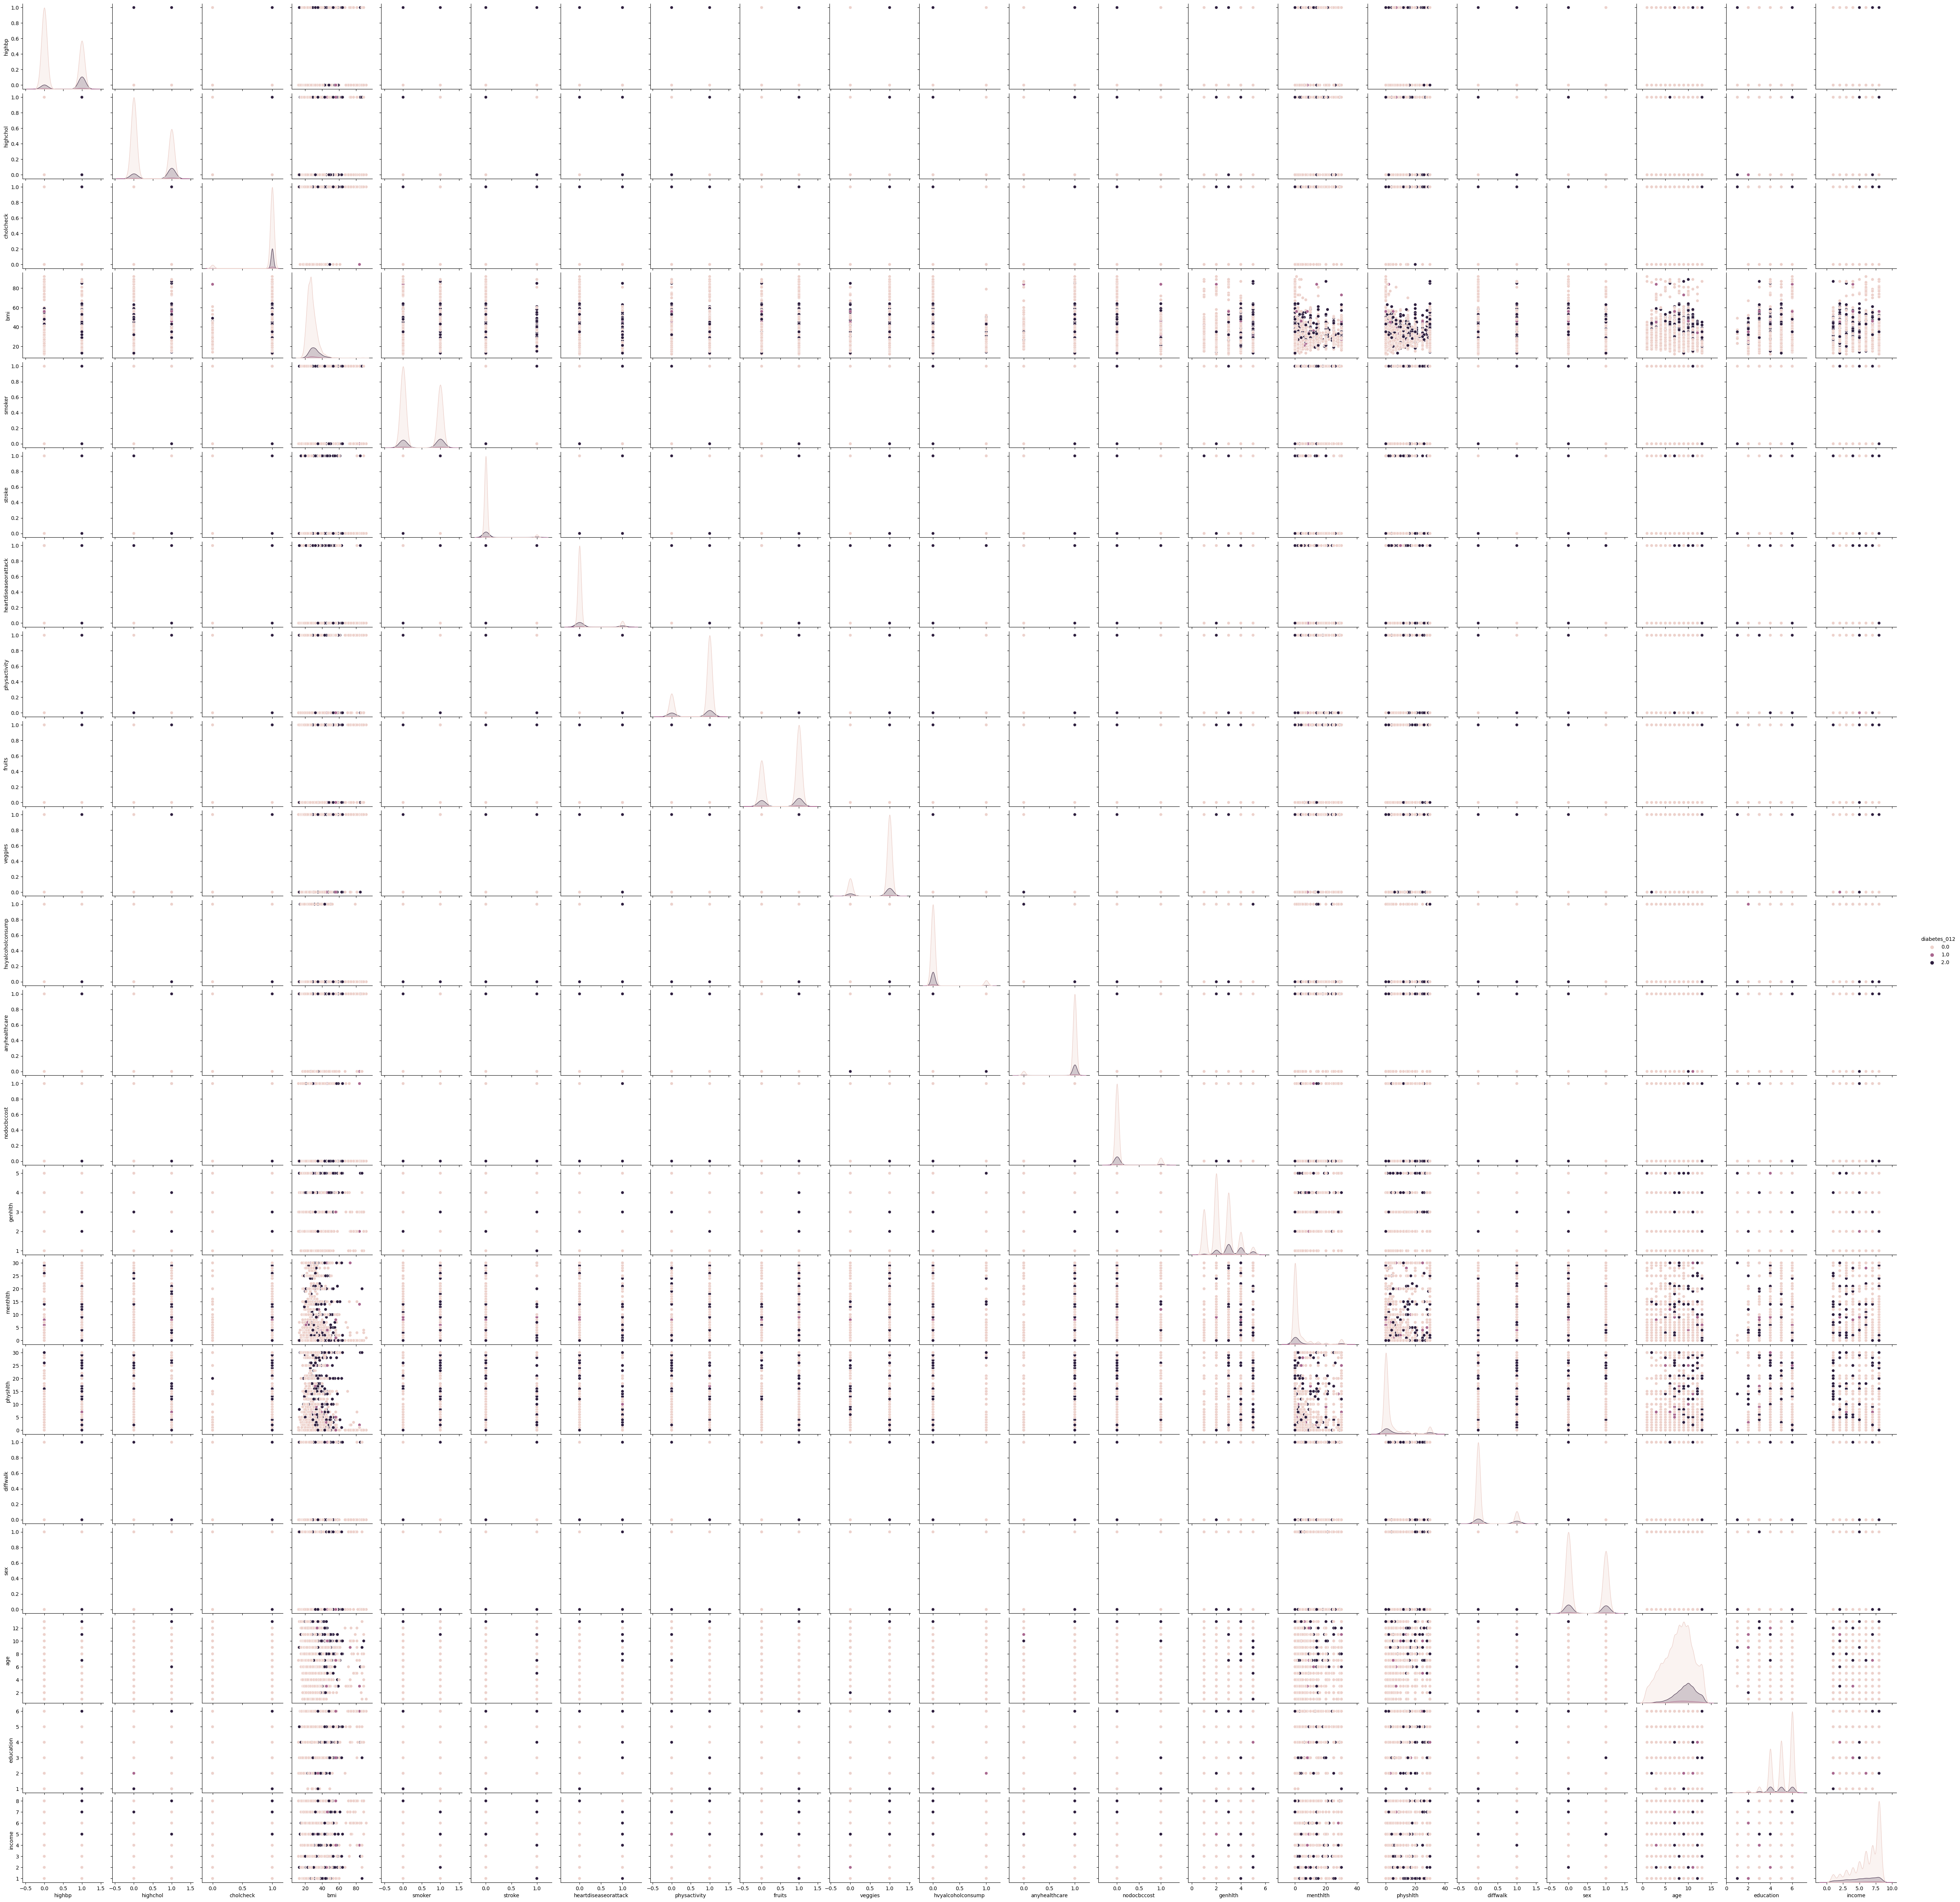

In [47]:
sns.pairplot(train.sample(14206), hue='diabetes_012')

In [69]:
def corr_heat(df, drops):
    '''Creates a heatmap off of the dataset
    
    arguments: df, 'drop items'
    
    returns: heatmap visualization'''
    sns.heatmap(df.drop(columns=drops).corr(), center=1)
    plt.title('Correlation Heatmap')

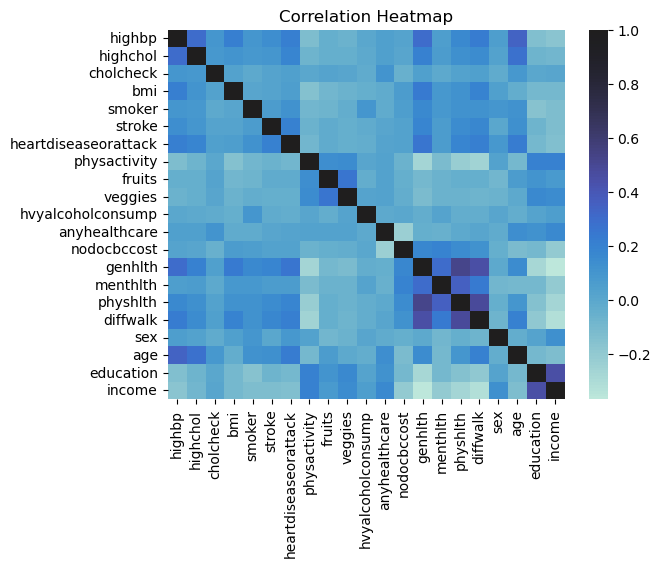

In [70]:
corr_heat(train, 'diabetes_012')

In [38]:
def column_split(df):
    '''Takes the qualitative and quantitative columns and splits them
    as such. Ex: cat_cols, num_cols = column_split(df)
    
    arguments: dataframe
    
    return: cat_cols, num_cols'''

    # separating our numeric and categorical columns:
    # initialize two empty lists for each type:
    cat_cols, num_cols = [], []
    # set up a for loop to build those lists out:
    # so for every column in explore_columns:
    for col in df:
        # check to see if its an object type,
        # if so toss it in categorical
        if df[col].dtype == 'O':
            cat_cols.append(col)
        # otherwise if its numeric:
        else:
            # check to see if we have more than just a few values:
            # if thats the case, toss it in categorical
            if df[col].nunique() < 10:
                cat_cols.append(col)
            # and otherwise call it continuous by elimination
            else:
                num_cols.append(col)

    return cat_cols, num_cols

In [39]:
def stacked_plot(col_to_stack, df):
    '''Takes the prepared columns from column_split function and plots
    stacked percentage graphs of each category.
    
    arguments: column list, dataframe
    
    return: visual barcharts'''
    
    for index, column in enumerate(col_to_stack):
        bar_by_cat = pd.crosstab(df[column], df['diabetes_012']).apply(lambda x: x/x.sum()*100, axis=1)
        bar_by_cat.plot(kind='bar', stacked=True)
        plt.ylabel('Percentage')
        plt.xlabel(column)

In [40]:
cat_cols, num_cols = column_split(train)

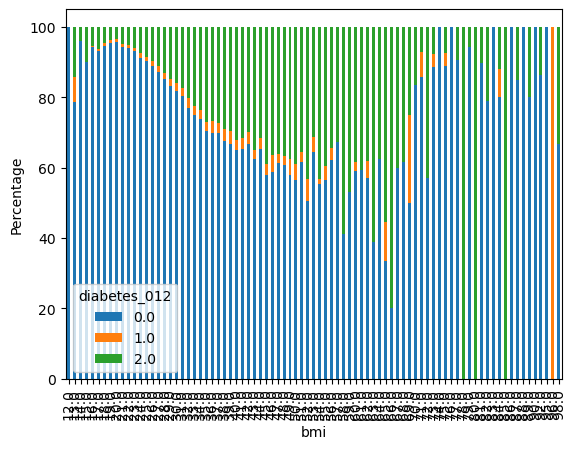

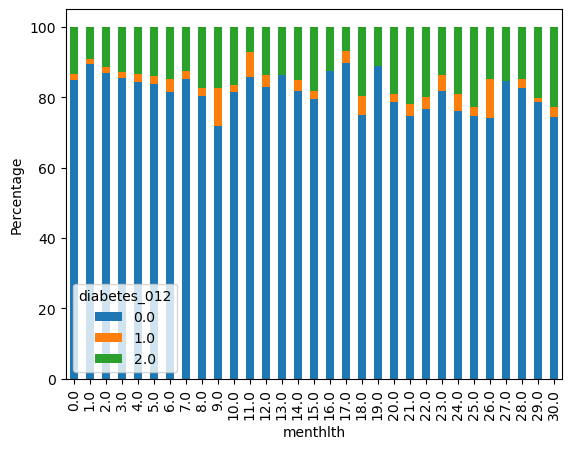

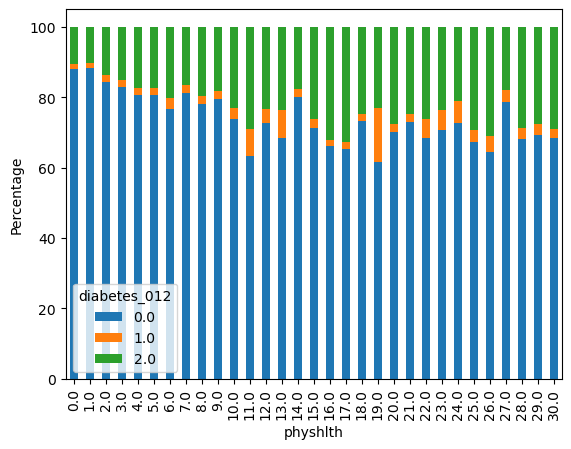

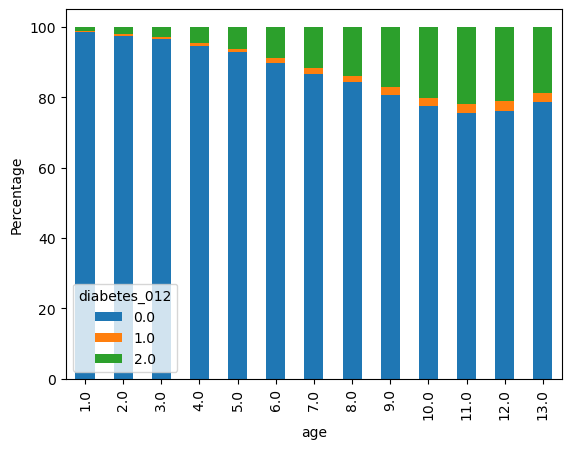

In [41]:
stacked_plot(num_cols, train)

### Age Category = 

* 1 = 18 - 24
* 2 = 25 - 30
* 3 = 30 - 35
* 4 = 35 - 40 
* 5 = 40 - 45
* 6 = 45 - 50
* 7 = 50 - 55
* 8 = 55 - 60
* 9 = 60 - 65
* 10 = 65 - 70
* 11 = 70 - 75
* 12 = 75 - 80
* 13 = 80 and Older

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]),
 [Text(0, 0, '12.0'),
  Text(1, 0, '13.0'),
  Text(2, 0, '14.0'),
  Text(3, 0, '15.0'),
  Text(4, 0, '16.0'),
  Text(5, 0, '17.0'),
  Text(6, 0, '18.0'),
  Text(7, 0, '19.0'),
  Text(8, 0, '20.0'),
  Text(9, 0, '21.0'),
  Text(10, 0, '22.0'),
  Text(11, 0, '23.0'),
  Text(12, 0, '24.0'),
  Text(13, 0, '25.0'),
  Text(14, 0, '26.0'),
  Text(15, 0, '27.0'),
  Text(16, 0, '28.0'),
  Text(17, 0, '29.0'),
  Text(18, 0, '30.0'),
  Text(19, 0, '31.0'),
  Text(20, 0, '32.0'),
  Text(21, 0, '33.0'),
  Text(22, 0, '34.0'),
  Text(23, 0, '35.0'),
  Text(24, 0, '36.0'),
  Text(25, 0, '37.0'),
  Text(26, 0, '38.0'),
  Text(27, 0, '

<Figure size 3000x2000 with 0 Axes>

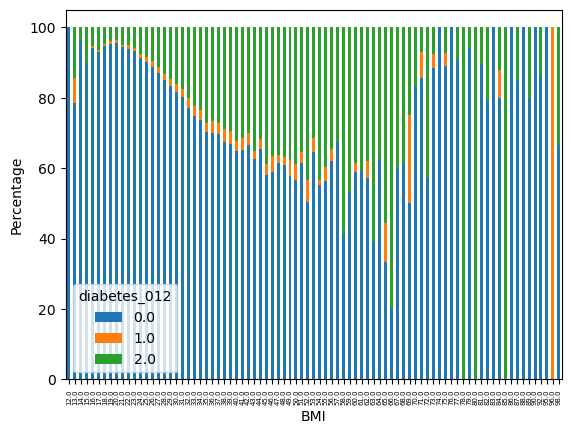

In [42]:
plt.figure(figsize=(30,20))
bar_by_cat = pd.crosstab(train['bmi'], train['diabetes_012']).apply(lambda x: x/x.sum()*100, axis=1)
bar_by_cat.plot(kind='bar', stacked=True)
plt.ylabel('Percentage')
plt.xlabel('BMI')
plt.xticks(fontsize=5)

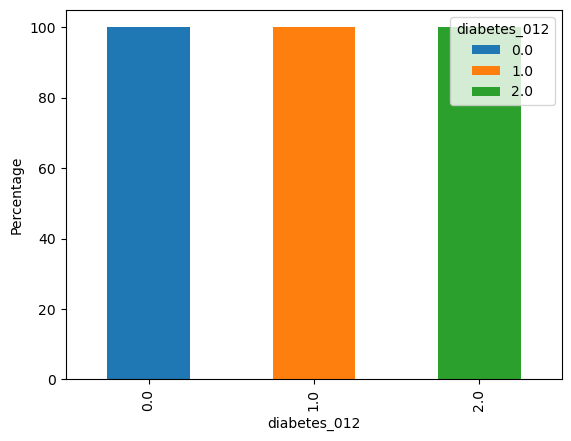

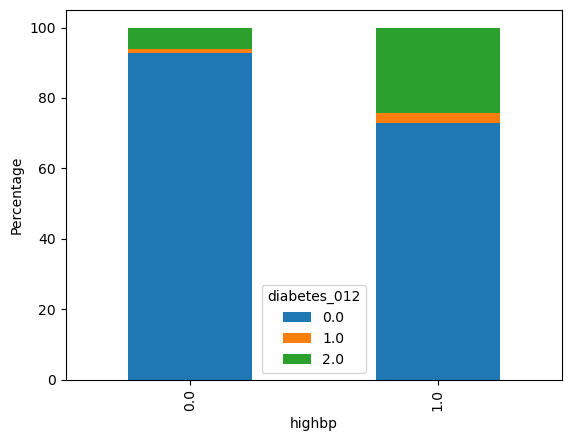

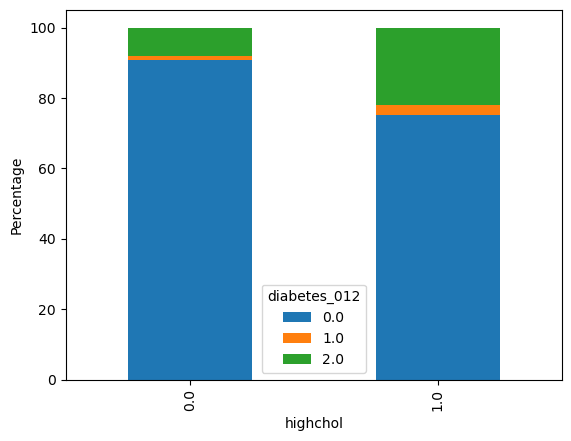

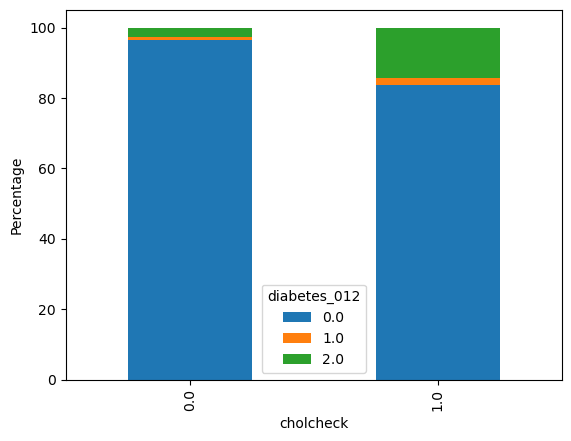

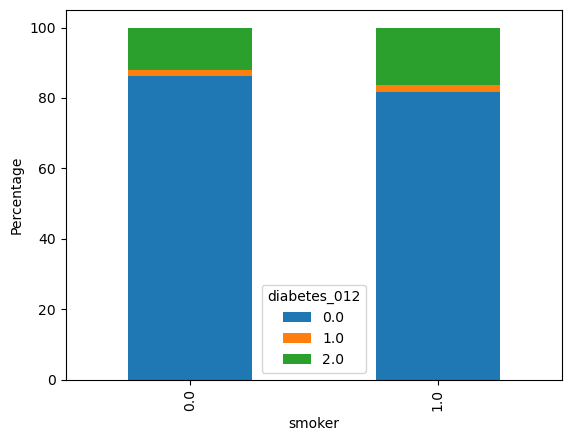

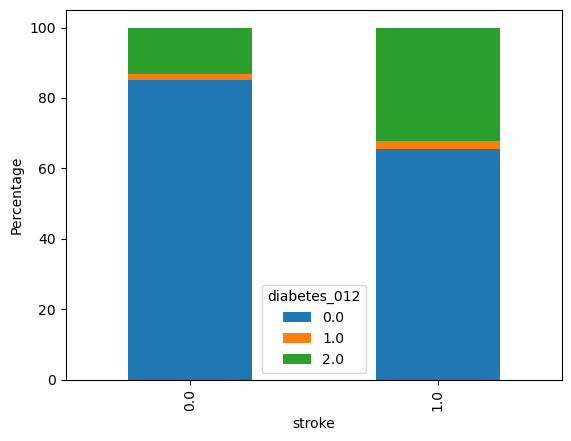

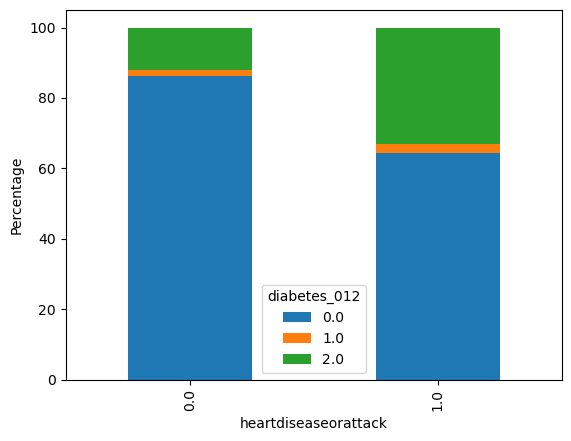

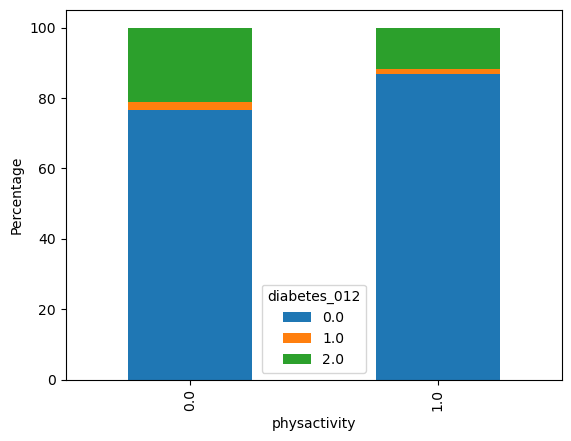

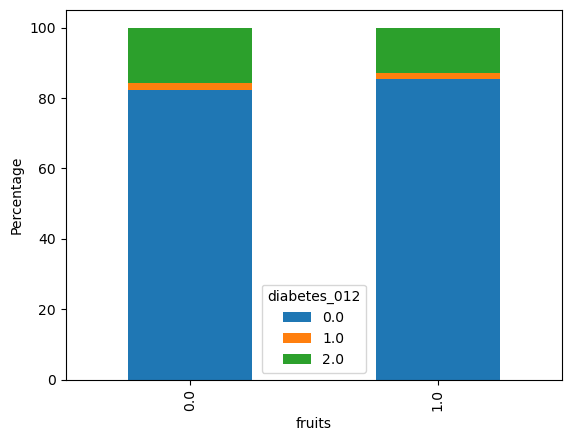

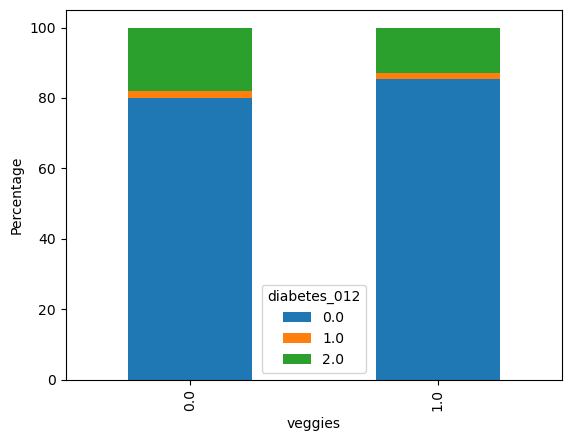

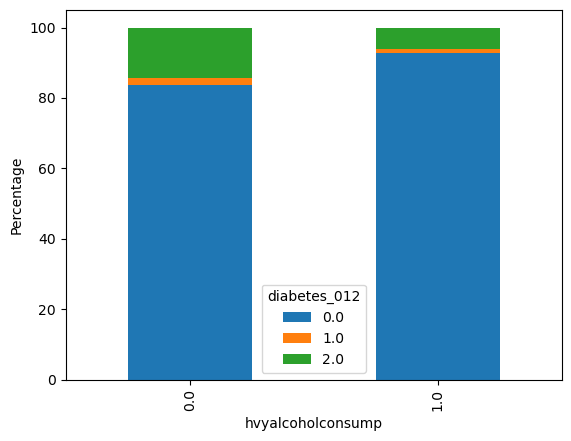

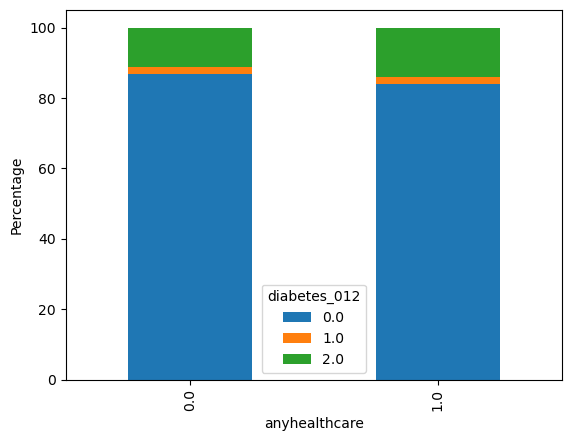

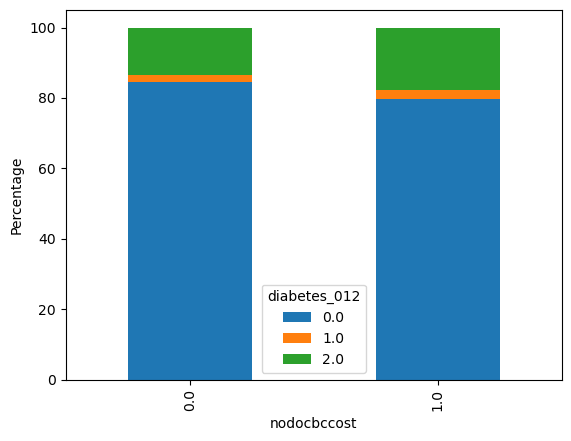

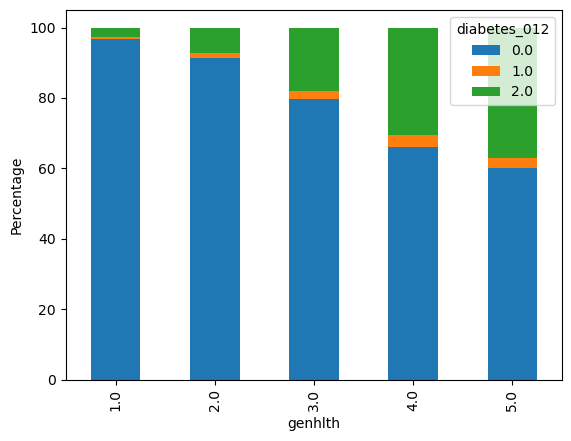

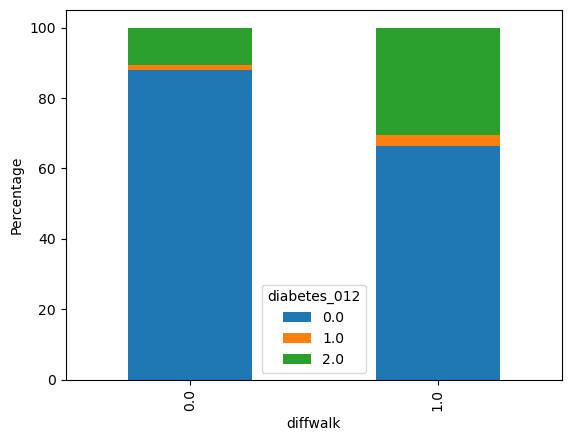

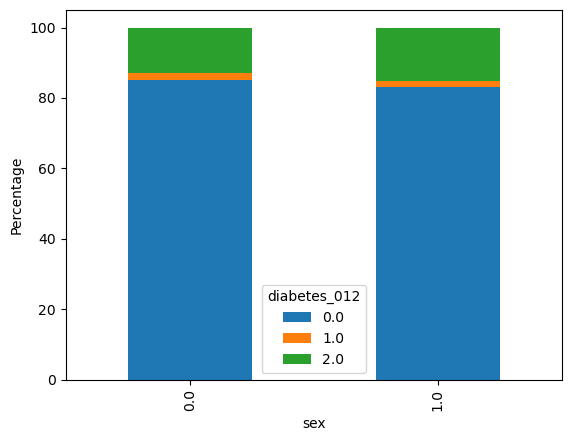

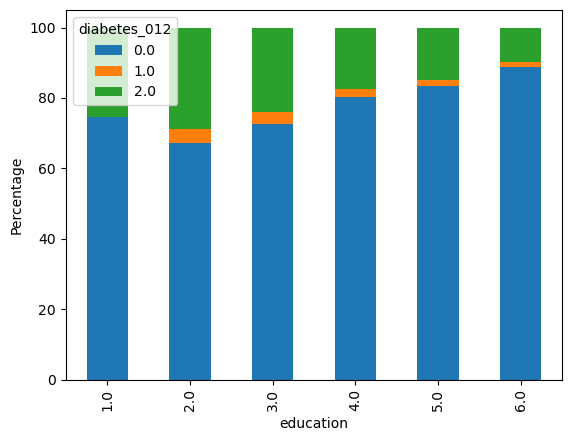

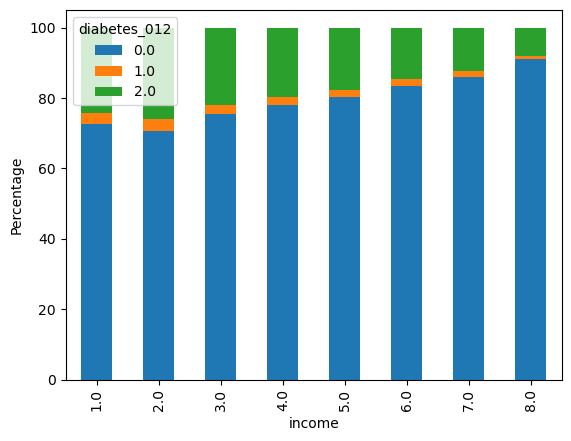

In [43]:
stacked_plot(cat_cols, train)

Xtra Notes for xplore

- age and diabetes_012
    - increases as age increases

- highbp/highchol/cholcheck
    - higher percentage for those with thoses who answered yes

- smoker
    - appears higher rate of diabetes in smokers

- stroke/heartdiseaseorattack
    - very large diff between those who have had a stroke and diabetes

- physactivity/fruits/veggies/
    - those who are not active have increased % in diabetes

- hvyalcoholconsump
    - could be skewed due to the question
    - more ppl lie about how much they drink
    - this is saying that more ppl who are not heavy drinkers have a higher % of diatetes

- anyhealthcare/nodocbccost
    - not much derived from this one

- genhlth
    - appears to be more % of diabetics the poorer the health

- diffwalk
    - diabetics have a higher chance of diff walking

- sex
    - doesnt appear to be alot of diff between if you are male or female

- education
    - lower education shows more diabetics

- income
    - lower income increases perc of diabetics

### Which ones to really look at?


- THERE ARE SIMILARITIES IN THE BAR GRAPHS FOR THESE GROUPS

* highbp/highchol/cholcheck
* smoker
* stroke/heartdiseaseorattack
* physactivity/fruits/veggies
* age
* education/income

In [83]:
explore_cols = ['highbp', 'highchol', 'smoker', 'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies', 'education', 'income']

In [84]:
def bar_plotter(df, x, explore_cols, hue):
    plt.figure(figsize=(16,6))
    for i, col in explore_cols:
        plot_num = i+1
        plt.subplot(2,4, plot_num)
        plt.title(col)
        sns.barplot(data=df, x=x, y=col, hue=hue)
        plt.grid(False)

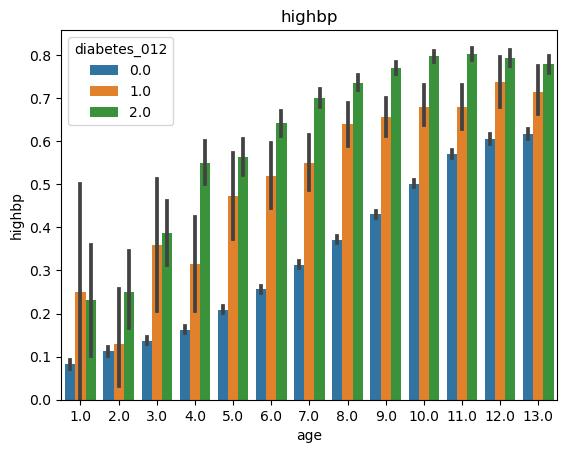

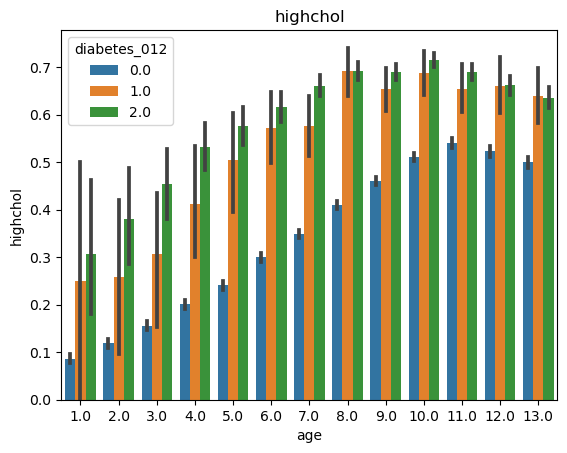

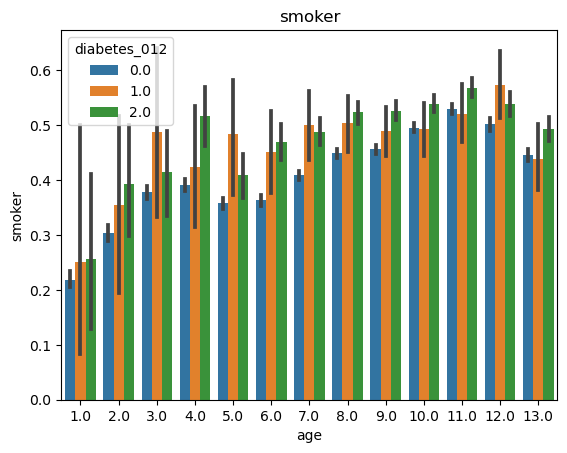

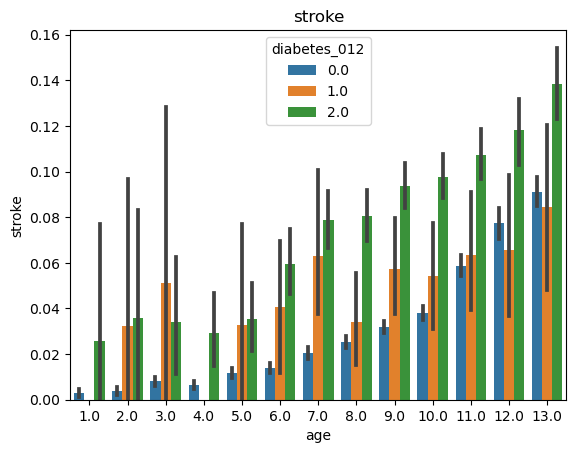

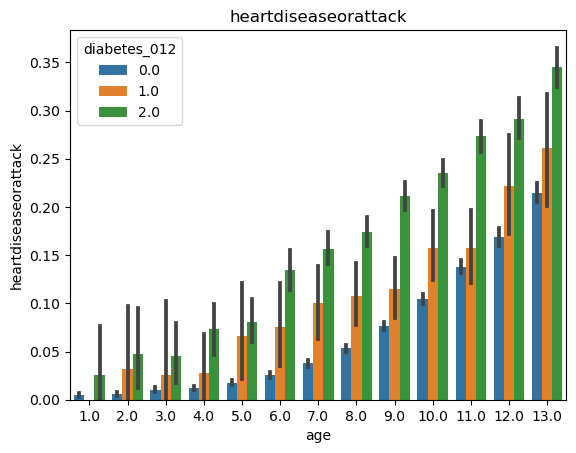

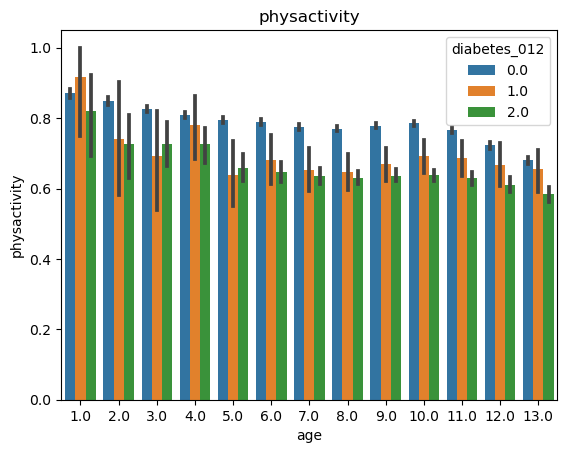

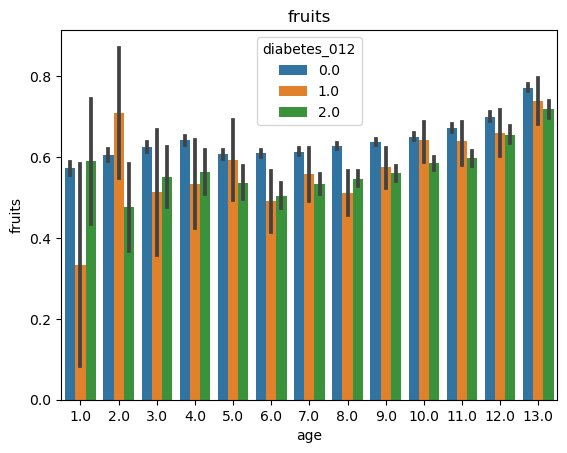

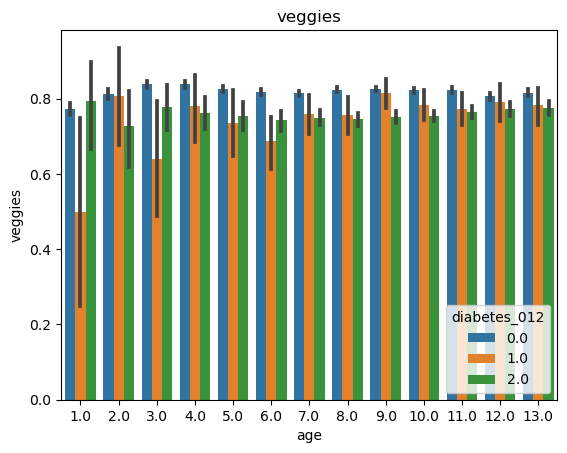

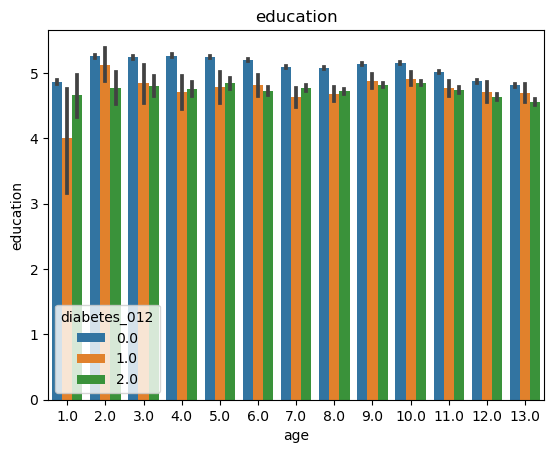

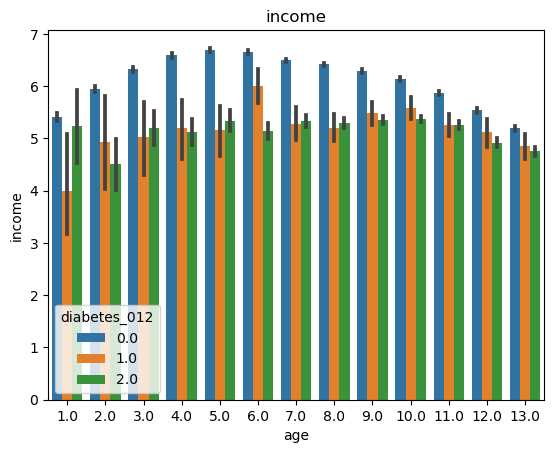

In [88]:
for col in explore_cols:
        plt.title(col)
        sns.barplot(data=train, x='age', y=col, hue='diabetes_012')
        plt.grid(False)
        plt.show()

## It appears that as you get older the percentage that have high blood pressure increases and your chance to have diabetes does as well


## It appears that as you get older, high cholesterol also increases diabetes

## This is just have you had your chol checked. Nothing really comes from this.

In [90]:
diabetes_df2.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                0.0   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      0.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   
1            0.0          1.0      3.0       0.0       0.0       0.0  0.0   
2            1.0          1.0      5.0      30.0      30.0       1.0  0.0   
3            1.0          0.0      2.0       0.0       0.0       0.0  0.0   
4            1.0          0.0      2.0       3.0       0.0       0.0  0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.0     8.0  
3  11.0        3.0     6.0  
4  11.0        5.0     4.0

In [91]:
diabetes_df2.columns = diabetes_df2.columns.str.lower()

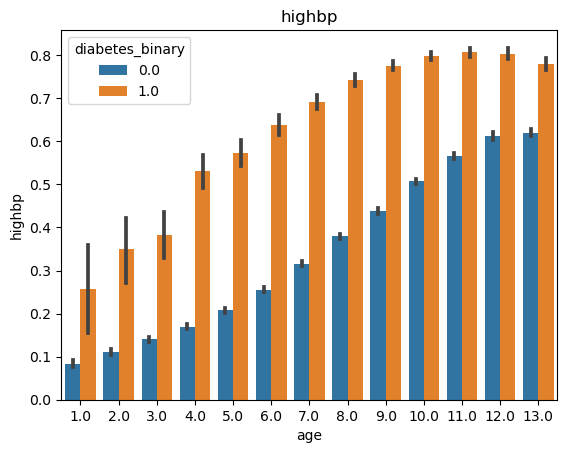

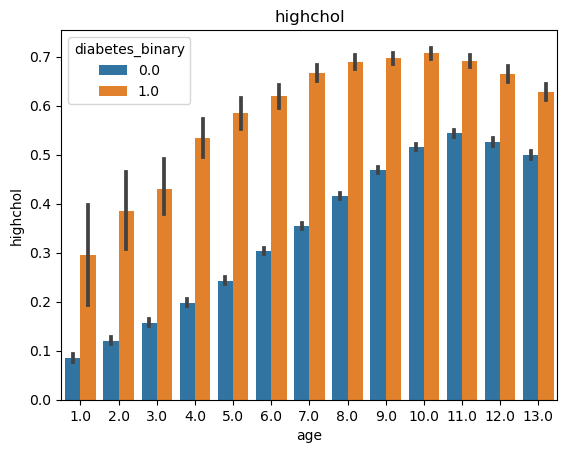

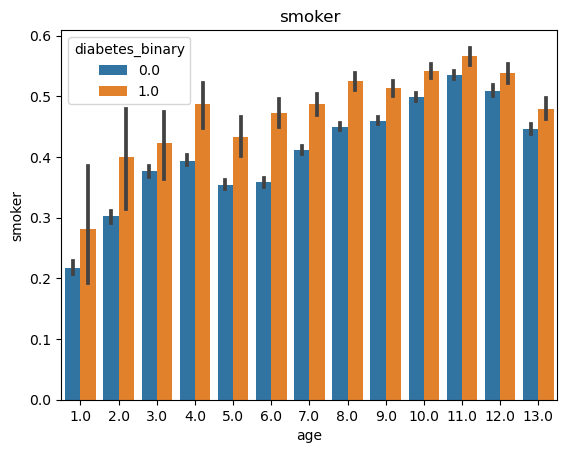

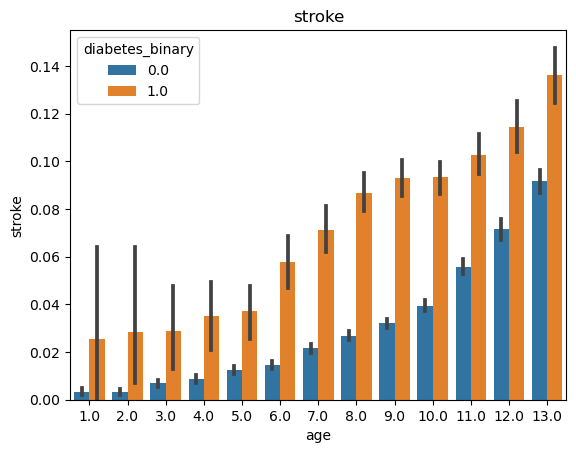

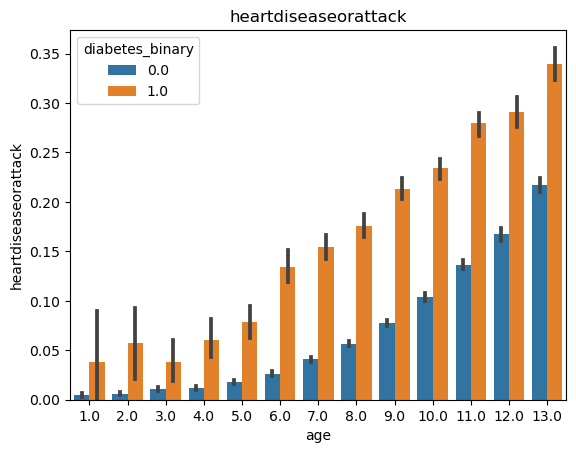

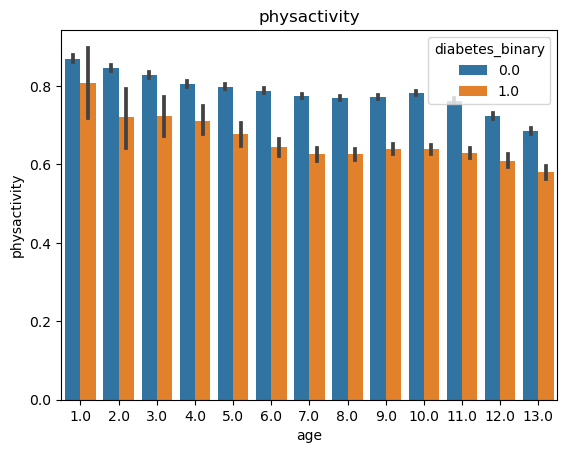

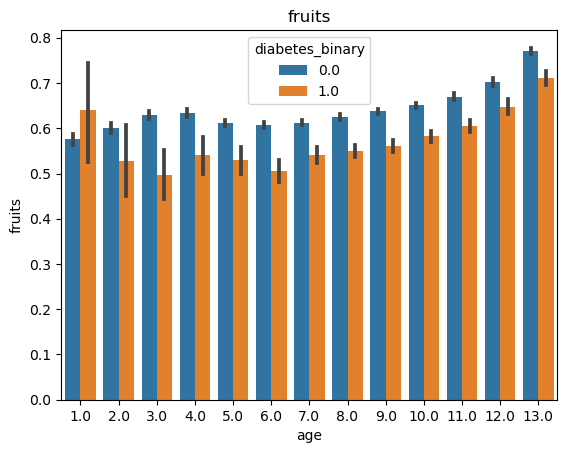

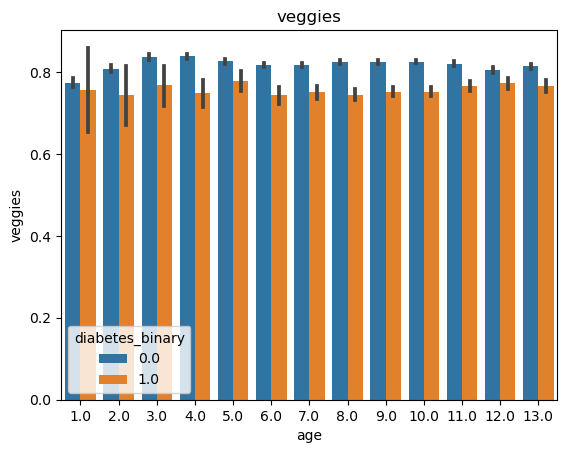

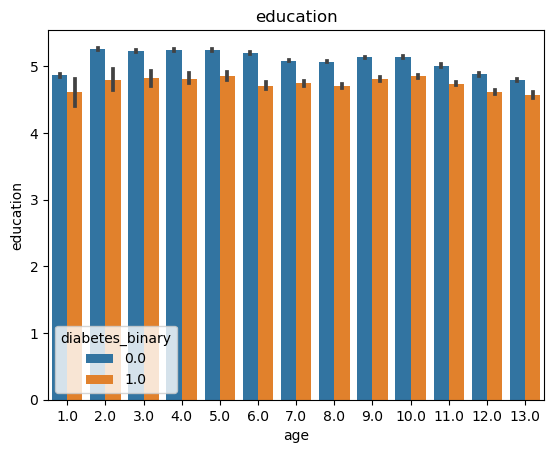

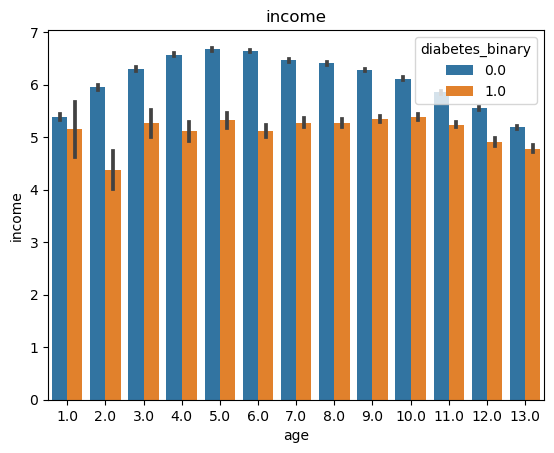

In [92]:
for col in explore_cols:
        plt.title(col)
        sns.barplot(data=diabetes_df2, x='age', y=col, hue='diabetes_binary')
        plt.grid(False)
        plt.show()

In [93]:
cat_cols, num_cols = column_split(diabetes_df2)

In [95]:
def stacked_plot(col_to_stack, df):
    '''Takes the prepared columns from column_split function and plots
    stacked percentage graphs of each category.
    
    arguments: column list, dataframe
    
    return: visual barcharts'''
    
    for index, column in enumerate(col_to_stack):
        bar_by_cat = pd.crosstab(df[column], df['diabetes_binary']).apply(lambda x: x/x.sum()*100, axis=1)
        bar_by_cat.plot(kind='bar', stacked=True)
        plt.ylabel('Percentage')
        plt.xlabel(column)

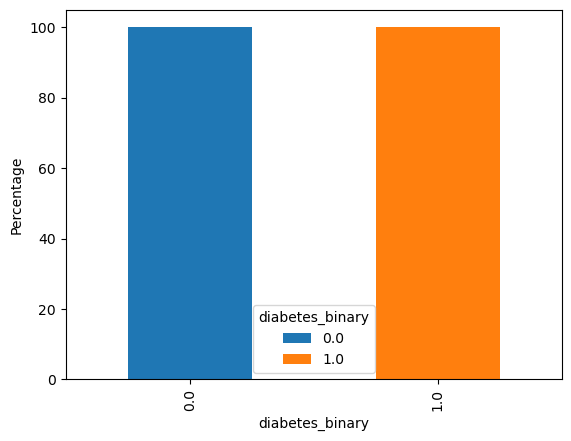

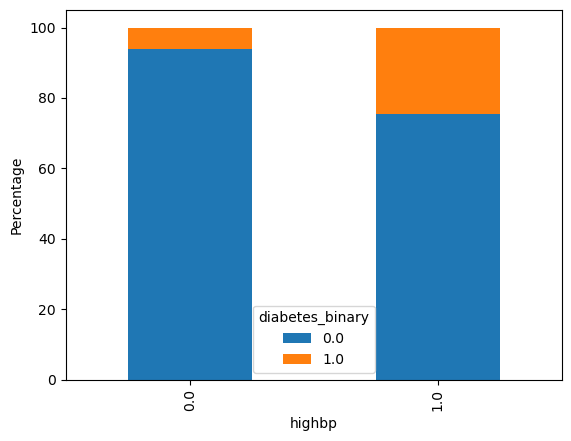

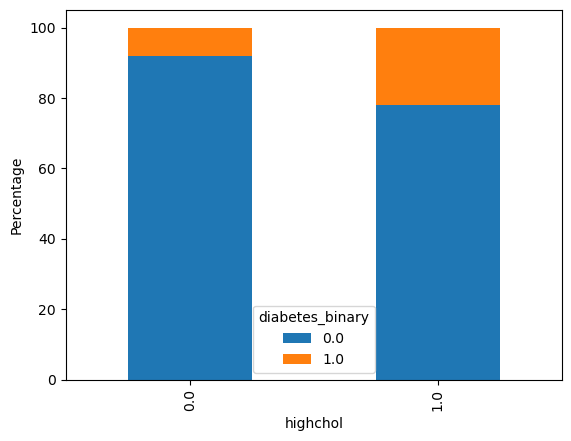

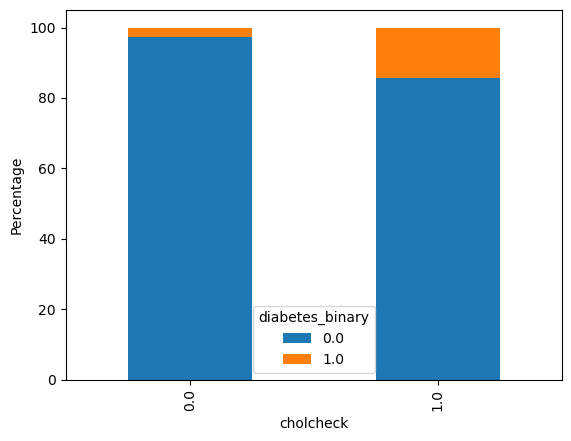

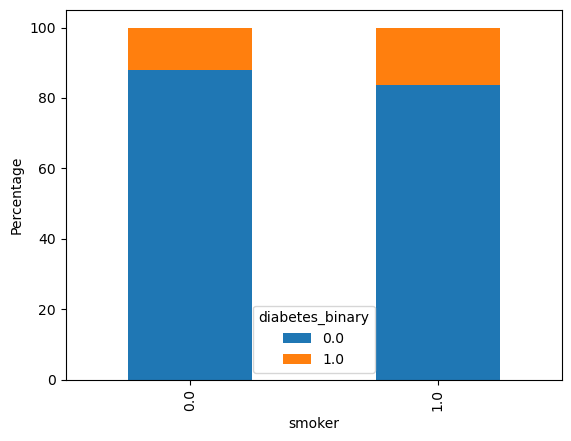

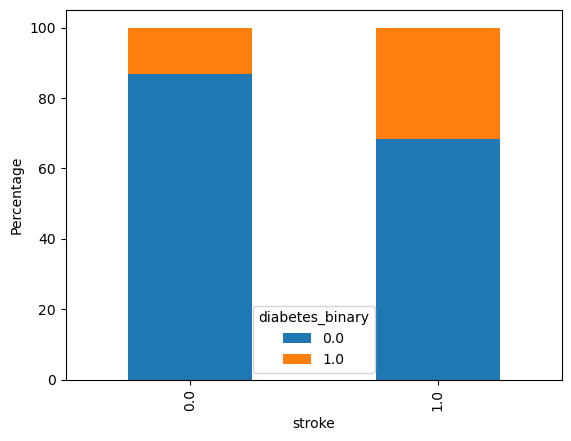

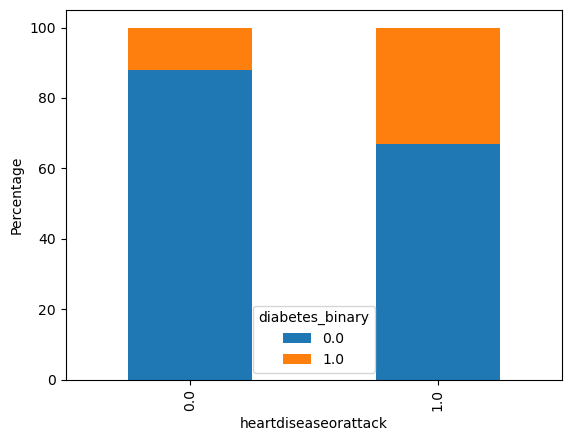

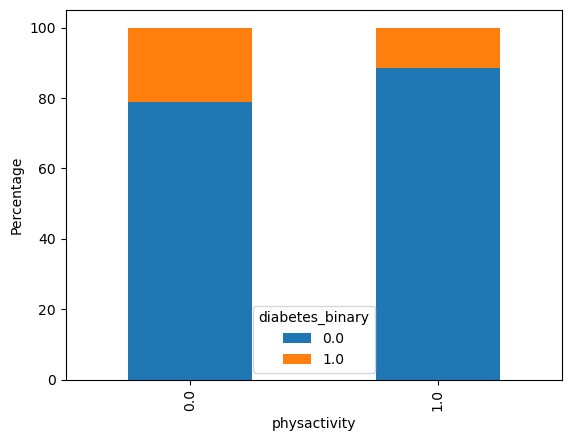

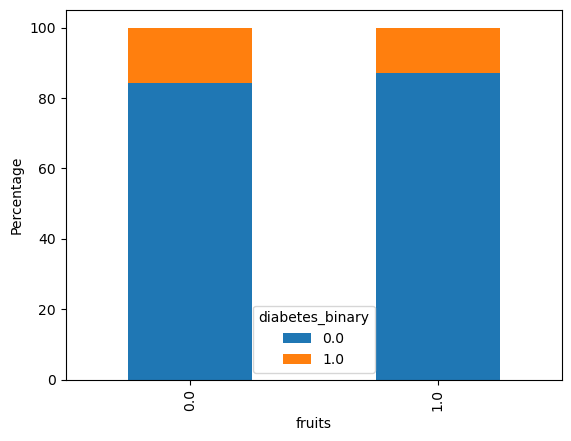

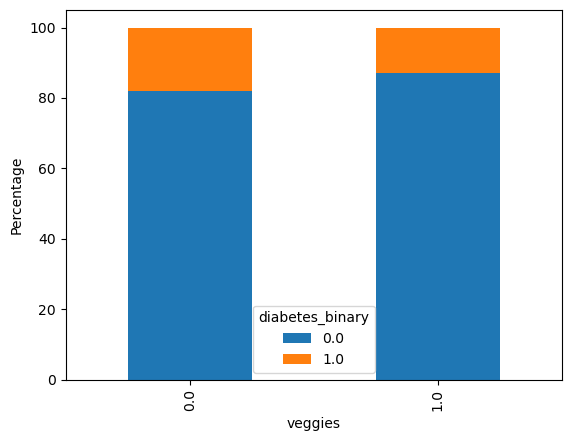

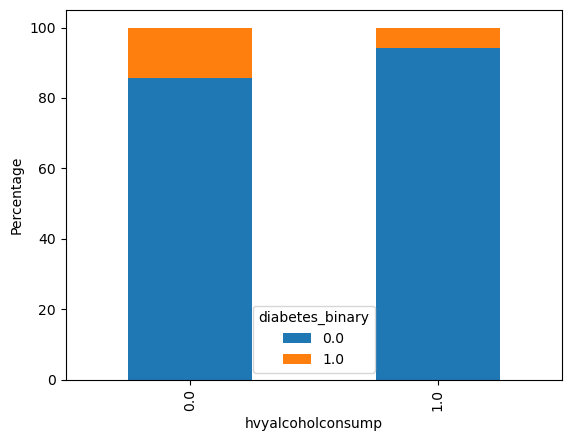

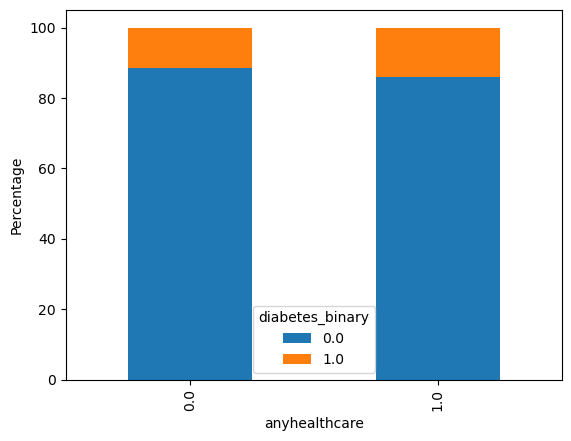

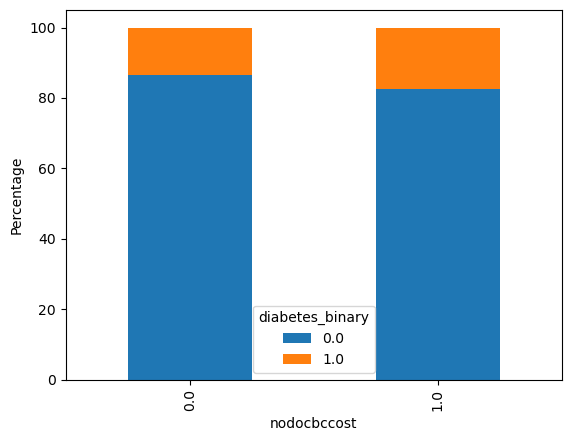

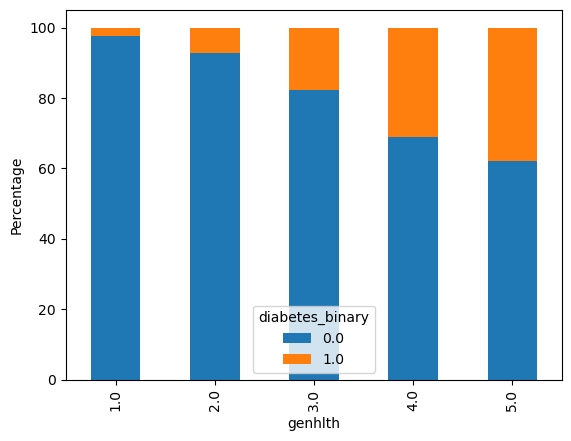

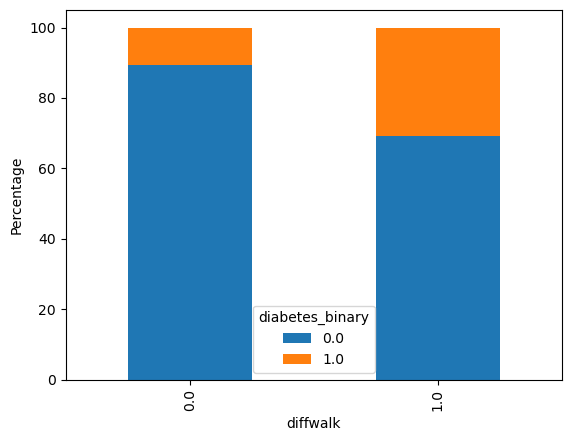

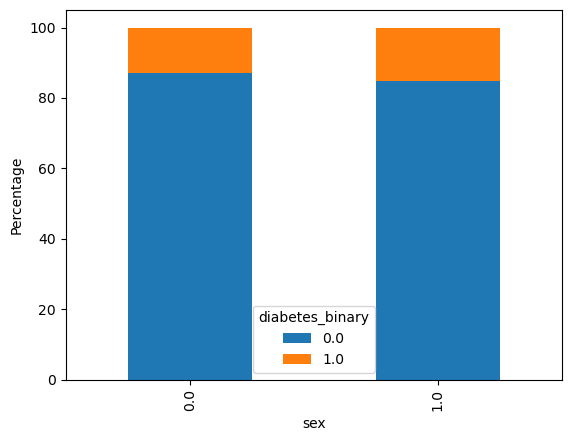

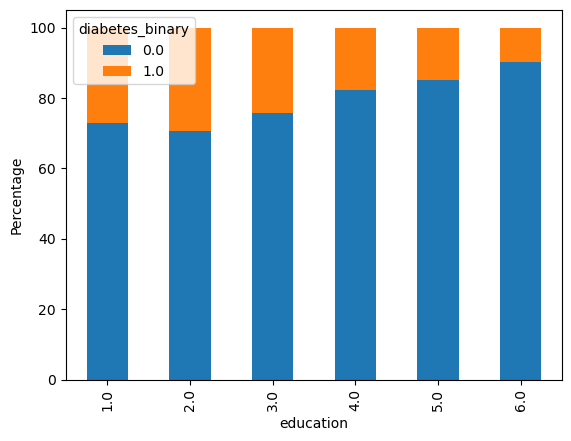

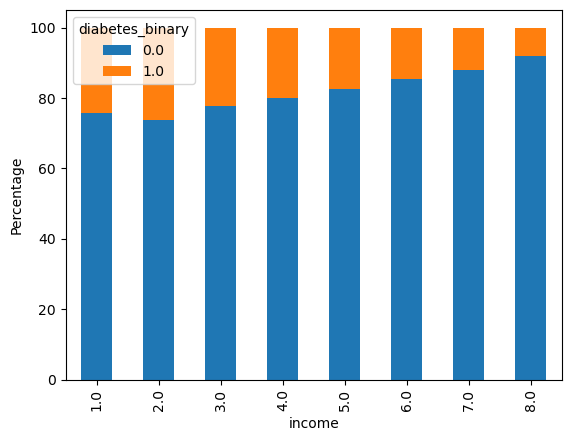

In [96]:
stacked_plot(cat_cols, diabetes_df2)

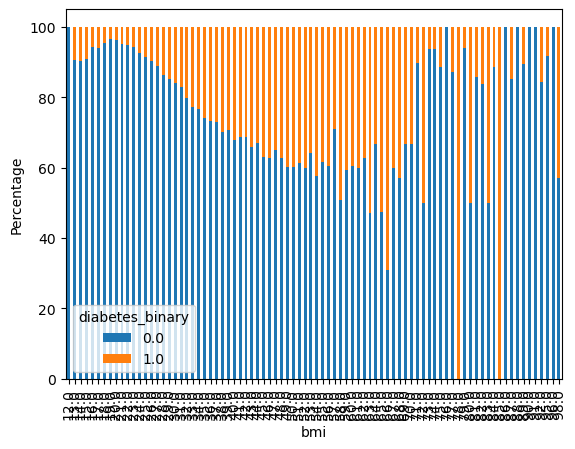

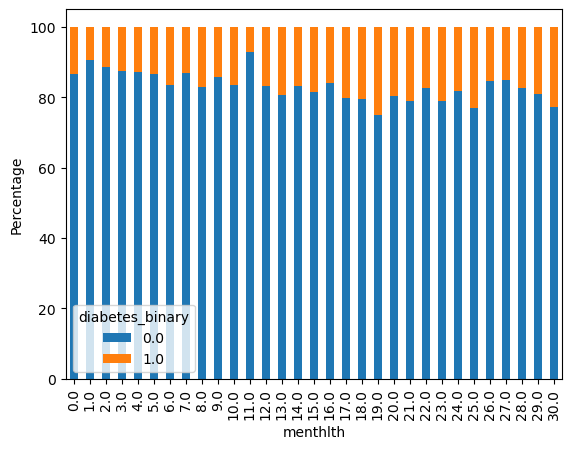

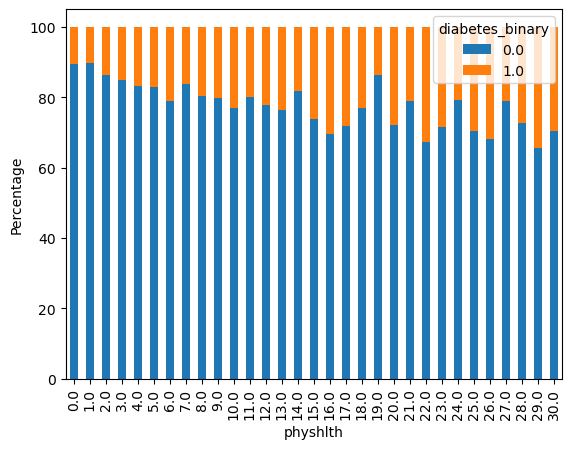

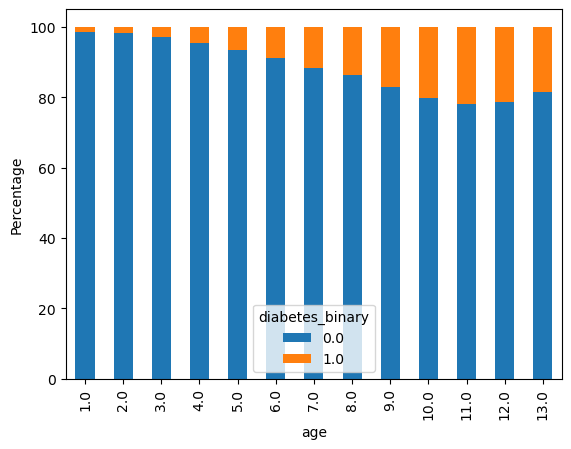

In [97]:
stacked_plot(num_cols, diabetes_df2)

In [98]:
from scipy import stats

In [ ]:
# def chi_stat(var1, var2):
#     '''Takes 2 variables from a dataframe and determines if they are independent of each other or not
    
#     arguments: var1, var2
    
#     returns: print statements'''
#     chi2, p, degf, expected = stats.chi2_contingency(var1, var2)
#     print('stat=%.3f, p=%.3f' % (stat, p))
#     if p > 0.05:
#         print('Probably independent')
#     else:
#         print('Probably dependent')